In [5]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('C:/Users/Checkout/Documents/Courses/ML/Project/Unified_Data.csv')
df.head(10)

ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                 -0.8857                 -0.9150                  9.5503   
1                 -0.8139                  1.2541                  9.4306   
2                -10.2466                -11.1079                 16.0610   
3                 -4.3679                 -7.6616                 -4.6180   
4                  5.0936                 -7.1863                 -5.2249   
5                 -4.2698                 -0.9342                  6.7887   
6                  2.8910                 -8.2409                 -3.9034   
7                  0.7303                 -3.7819                 -5.8857   
8                  9.0307                 -3.2085                -11.3287   
9                  2.9664                  0.2964                -12.3581   

   GRAVITY X (m/s²)  GRAVITY Y (m/s²)  GRAVITY Z (m/s²)  \
0           -1.1034           -0.0603            9.7442   
1           -0.5532            1.0615            9.7333   
2            0.9801            6.8492           -6.9497   
3            3.5523           -8.1039           -4.2283   
4            4.0020           -8.0153           -3.9886   
5            4.4093           -7.0490           -5.1999   
6            3.4930           -7.3200           -5.5124   
7            5.8493           -4.9318           -6.1346   
8            4.4976           -3.8006           -7.8420   
9            4.7917           -6.5177           -5.5434   

   LINEAR ACCELERATION X (m/s²)  LINEAR ACCELERATION Y (m/s²)  \
0                       -0.6645                        0.8831   
1                       -1.8757                        0.1955   
2                        4.7212                       -7.9441   
3                        2.8049                       -3.7581   
4                        5.1214                       -3.4253   
5                        1.3550                        1.7379   
6                       -2.6040                       -0.1953   
7                        0.3805                       -3.2770   
8                        4.9471                        0.3889   
9                       -0.6147                       -1.6548   

   LINEAR ACCELERATION Z (m/s²)  GYROSCOPE X (rad/s)  GYROSCOPE Y (rad/s)  \
0                        0.6781              -1.0842              -1.7585   
1                       -0.1211               0.2783              -0.5358   
2                       -9.0559              -1.0009              -2.9897   
3                       -7.1497               0.0703              -0.1928   
4                        3.9980              -0.4245               0.0546   
5                       -0.2957              -0.0296               0.6270   
6                       -1.0571               0.4249              -0.9775   
7                        1.8386              -0.8341               0.7256   
8                        0.1034               0.1699              -0.6543   
9                       -0.1351              -0.2764               2.2525   

   GYROSCOPE Z (rad/s)  Time since start in ms   YYYY-MO-DD HH-MI-SS_SSS  \
0               0.1958                        8  2021-03-19 12:15:58:176   
1               1.6936                      508  2021-03-19 12:15:58:676   
2              -6.4581                     1007  2021-03-19 12:15:59:175   
3              -0.3580                     1508  2021-03-19 12:15:59:676   
4               0.3329                     2008  2021-03-19 12:16:00:176   
5              -1.0849                     2508  2021-03-19 12:16:00:676   
6              -0.3583                     3007  2021-03-19 12:16:01:175   
7              -0.6069                     3508  2021-03-19 12:16:01:676   
8               1.6112                     4007  2021-03-19 12:16:02:175   
9              -0.8897                     4508  2021-03-19 12:16:02:676   

  activity  
0  Cycling  
1  Cycling  
2  Cycling  
3  Cycling  
4  Cycling  
5  Cycling  
6  Cycling  


In [7]:
df['activity'].unique()

array(['Cycling', 'Jogging', 'Pushups', 'Sitting', 'Swimming', 'Walking',
       'WalkingDownstairs', 'WalkingUpstairs'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22097 entries, 0 to 22096
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ACCELEROMETER X (m/s²)        22097 non-null  float64
 1   ACCELEROMETER Y (m/s²)        22097 non-null  float64
 2   ACCELEROMETER Z (m/s²)        22097 non-null  float64
 3   GRAVITY X (m/s²)              22097 non-null  float64
 4   GRAVITY Y (m/s²)              22097 non-null  float64
 5   GRAVITY Z (m/s²)              22097 non-null  float64
 6   LINEAR ACCELERATION X (m/s²)  22097 non-null  float64
 7   LINEAR ACCELERATION Y (m/s²)  22097 non-null  float64
 8   LINEAR ACCELERATION Z (m/s²)  22097 non-null  float64
 9   GYROSCOPE X (rad/s)           22097 non-null  float64
 10  GYROSCOPE Y (rad/s)           22097 non-null  float64
 11  GYROSCOPE Z (rad/s)           22097 non-null  float64
 12  Time since start in ms        22097 non-null  int64  
 13  Y

In [10]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)
print('Number of duplicates in data: {}'.format(sum(df.duplicated())))

Number of duplicates in data: 0


In [12]:
#Null values in the dataframe
df.isnull().sum()

ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
YYYY-MO-DD HH-MI-SS_SSS         0
activity                        0
dtype: int64

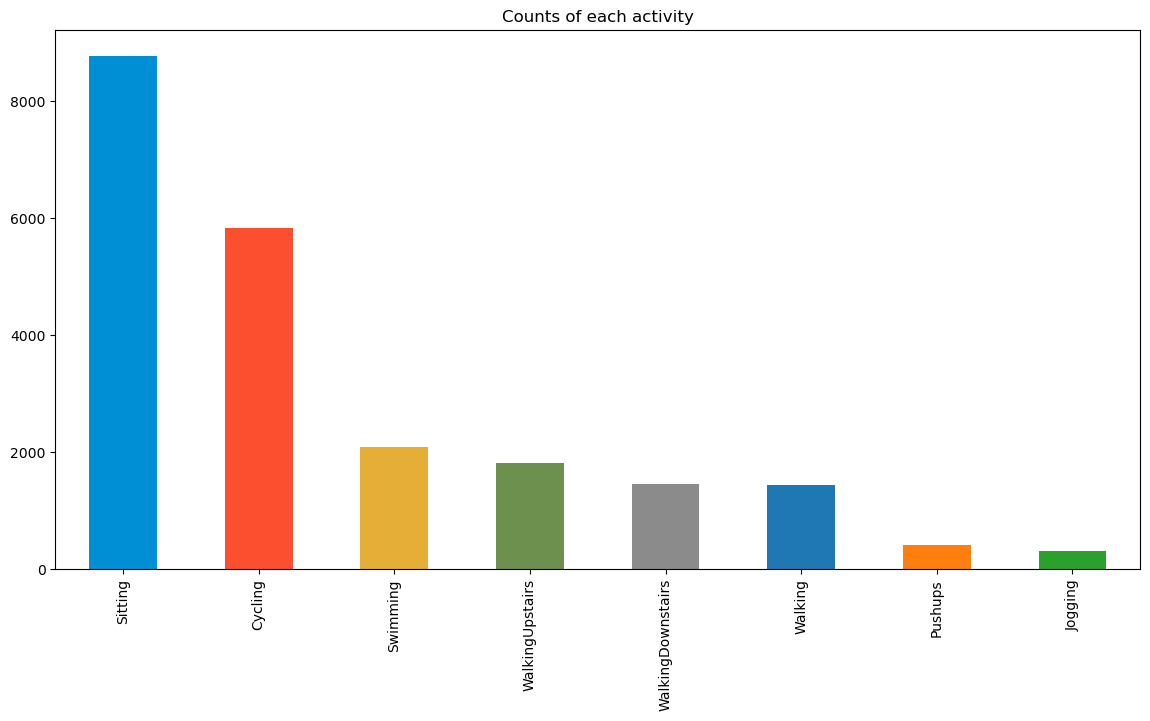

In [13]:
colors = ['#008fd5', '#fc4f30', '#e5ae37', '#6d904f', '#8b8b8b', '#1f77b4', '#ff7f0e', '#2ca02c']
df.activity.value_counts().plot(kind='bar',figsize=(14,7),color=colors,title='Counts of each activity')
plt.show()

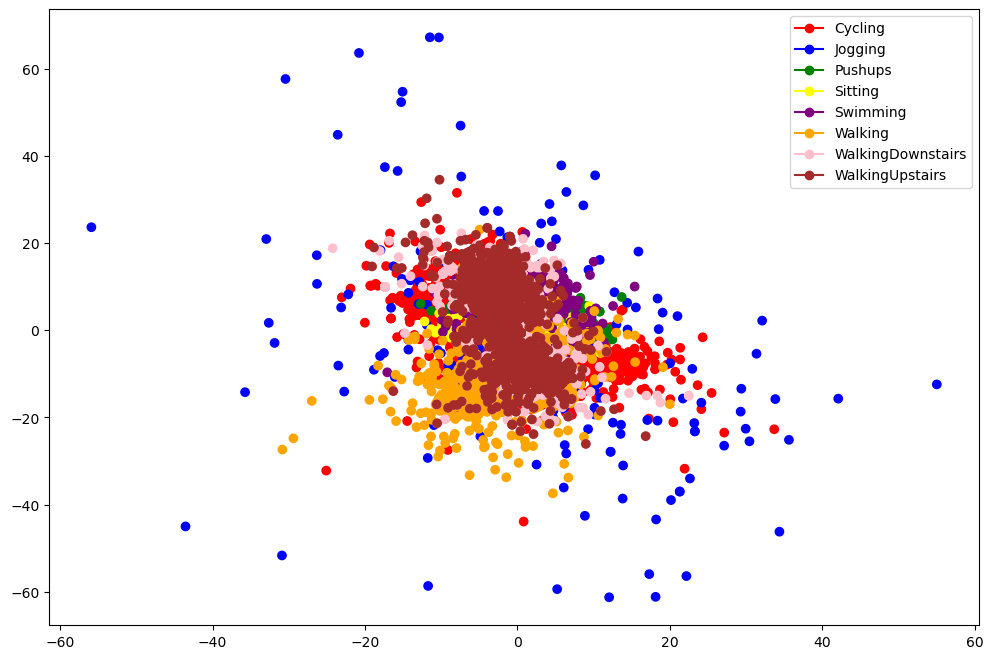

In [14]:
# Create a dictionary of colors for each activity
activity_colors = {
    'Cycling': 'red',
    'Jogging': 'blue',
    'Pushups': 'green',
    'Sitting': 'yellow',
    'Swimming': 'purple',
    'Walking': 'orange',
    'WalkingDownstairs': 'pink',
    'WalkingUpstairs': 'brown'
}

plt.figure(figsize=(12, 8))

# Create a scatter plot of two columns with colors based on activity
plt.scatter(df['ACCELEROMETER X (m/s²)'], df['ACCELEROMETER Y (m/s²)'], c=df['activity'].map(activity_colors))

# Add a legend to the plot
legend = plt.legend(handles=[plt.Line2D([], [], marker='o', color=color, label=activity) for activity, color in activity_colors.items()])

# Display the plot
plt.show()

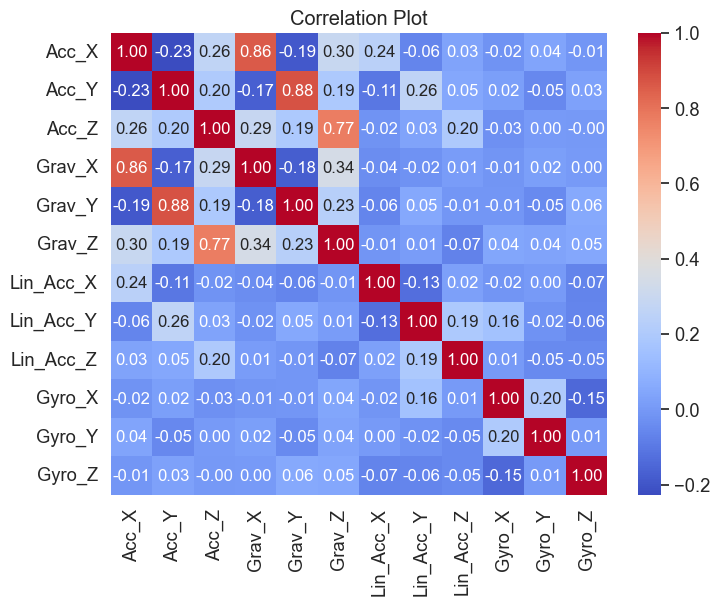

In [15]:
alias_names = {'ACCELEROMETER X (m/s²)': 'Acc_X', 
               'ACCELEROMETER Y (m/s²)': 'Acc_Y', 
               'ACCELEROMETER Z (m/s²)': 'Acc_Z', 
               'GRAVITY X (m/s²)': 'Grav_X', 
               'GRAVITY Y (m/s²)': 'Grav_Y', 
               'GRAVITY Z (m/s²)': 'Grav_Z', 
               'LINEAR ACCELERATION X (m/s²)': 'Lin_Acc_X', 
               'LINEAR ACCELERATION Y (m/s²)': 'Lin_Acc_Y', 
               'LINEAR ACCELERATION Z (m/s²)': 'Lin_Acc_Z', 
               'GYROSCOPE X (rad/s)': 'Gyro_X', 
               'GYROSCOPE Y (rad/s)': 'Gyro_Y', 
               'GYROSCOPE Z (rad/s)': 'Gyro_Z', 
               'activity': 'Activity'}

# create the correlation matrix for the selected columns
corr_matrix = df[['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)', 'ACCELEROMETER Z (m/s²)', 
                  'GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)', 'GRAVITY Z (m/s²)', 
                  'LINEAR ACCELERATION X (m/s²)', 'LINEAR ACCELERATION Y (m/s²)', 'LINEAR ACCELERATION Z (m/s²)', 
                  'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)', 'activity']].corr()

# plot the heatmap using the dictionary to replace the column names
sns.set(font_scale=1.2)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={'size':12}, 
            xticklabels=[alias_names[col] for col in corr_matrix.columns], 
            yticklabels=[alias_names[col] for col in corr_matrix.columns])
plt.title('Correlation Plot')
plt.show()

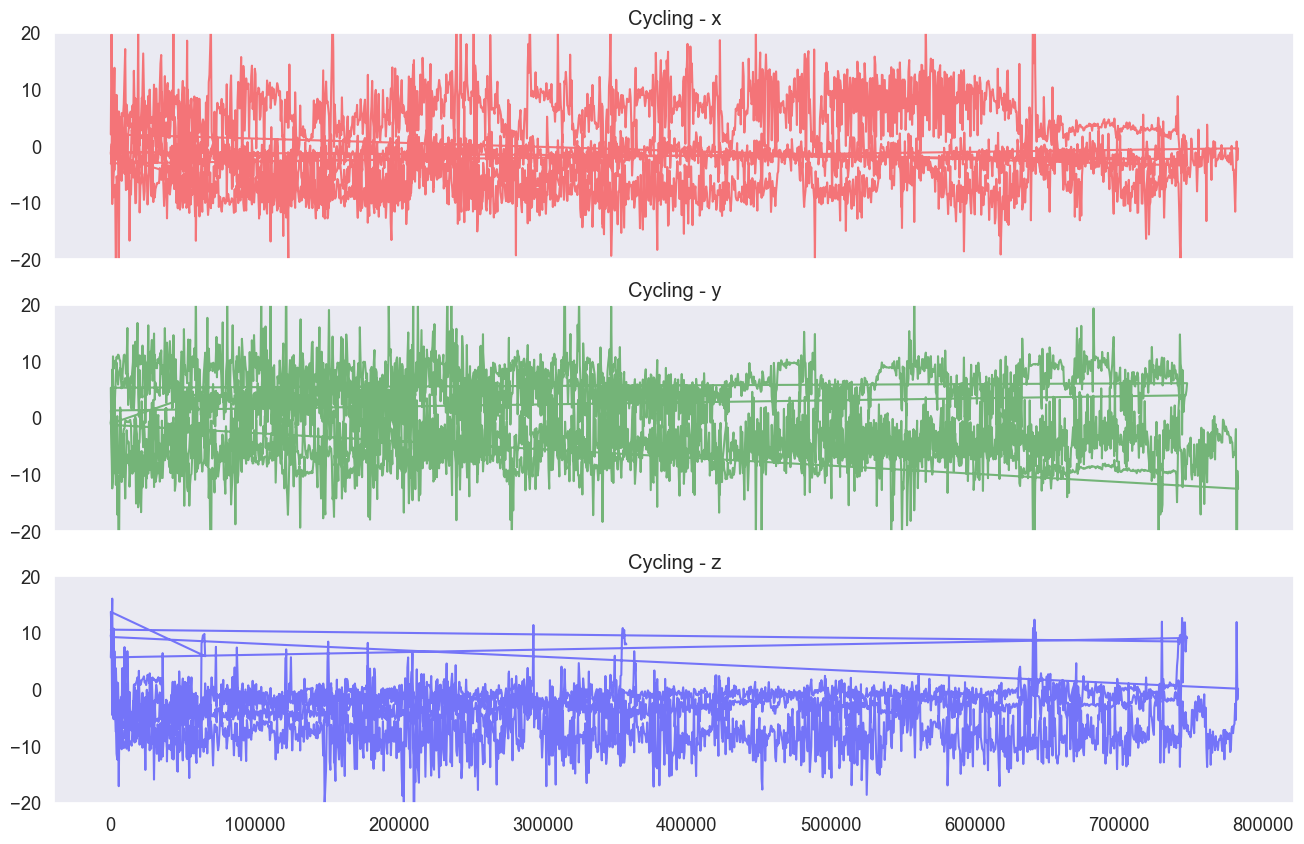

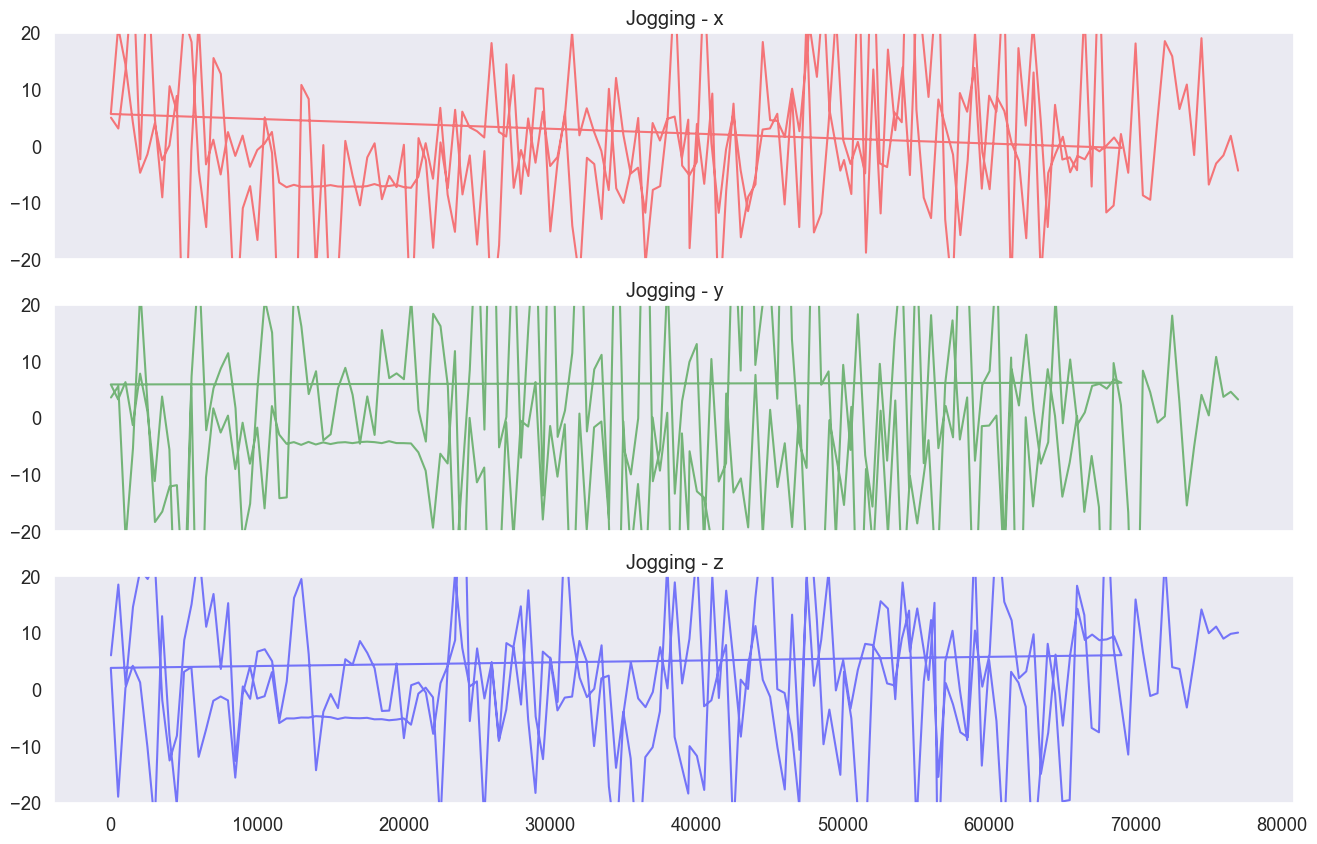

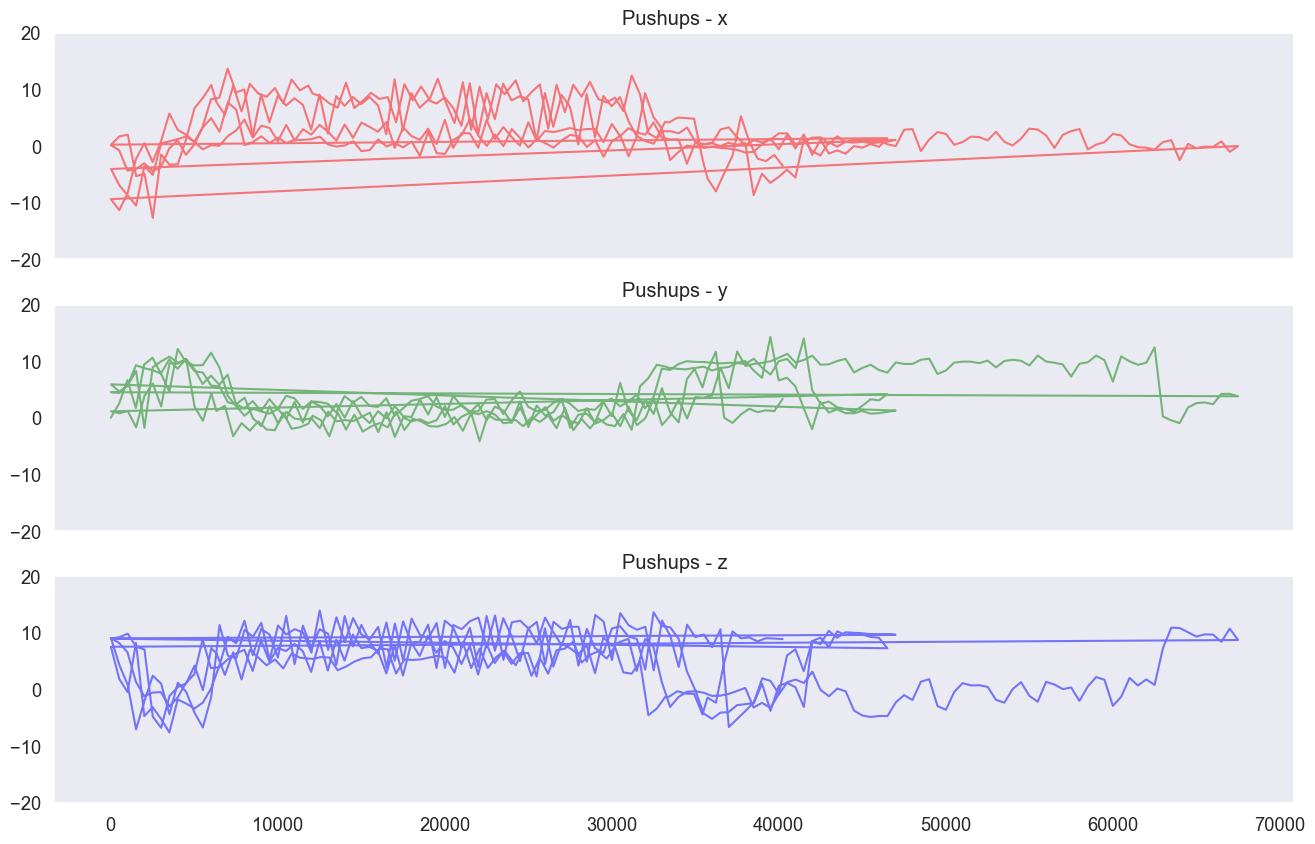

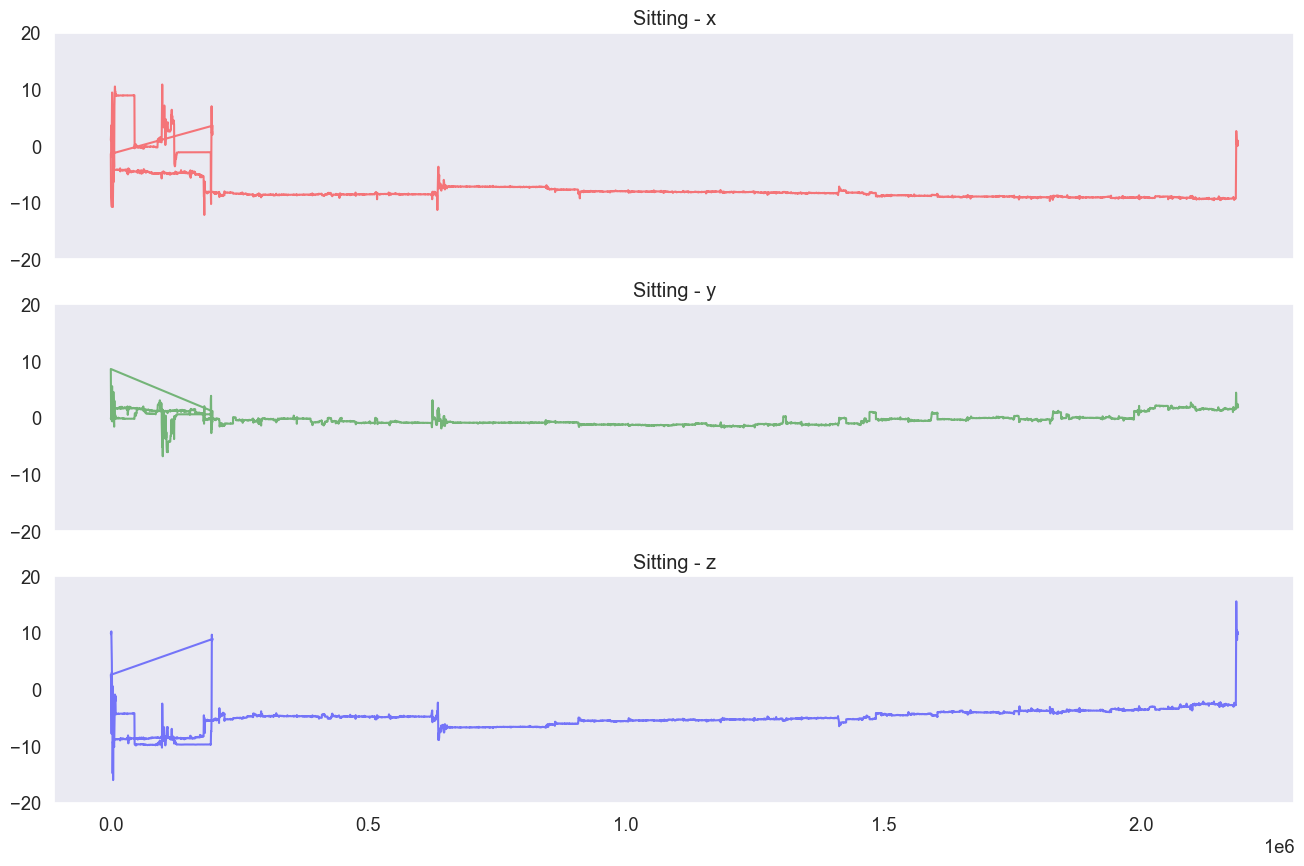

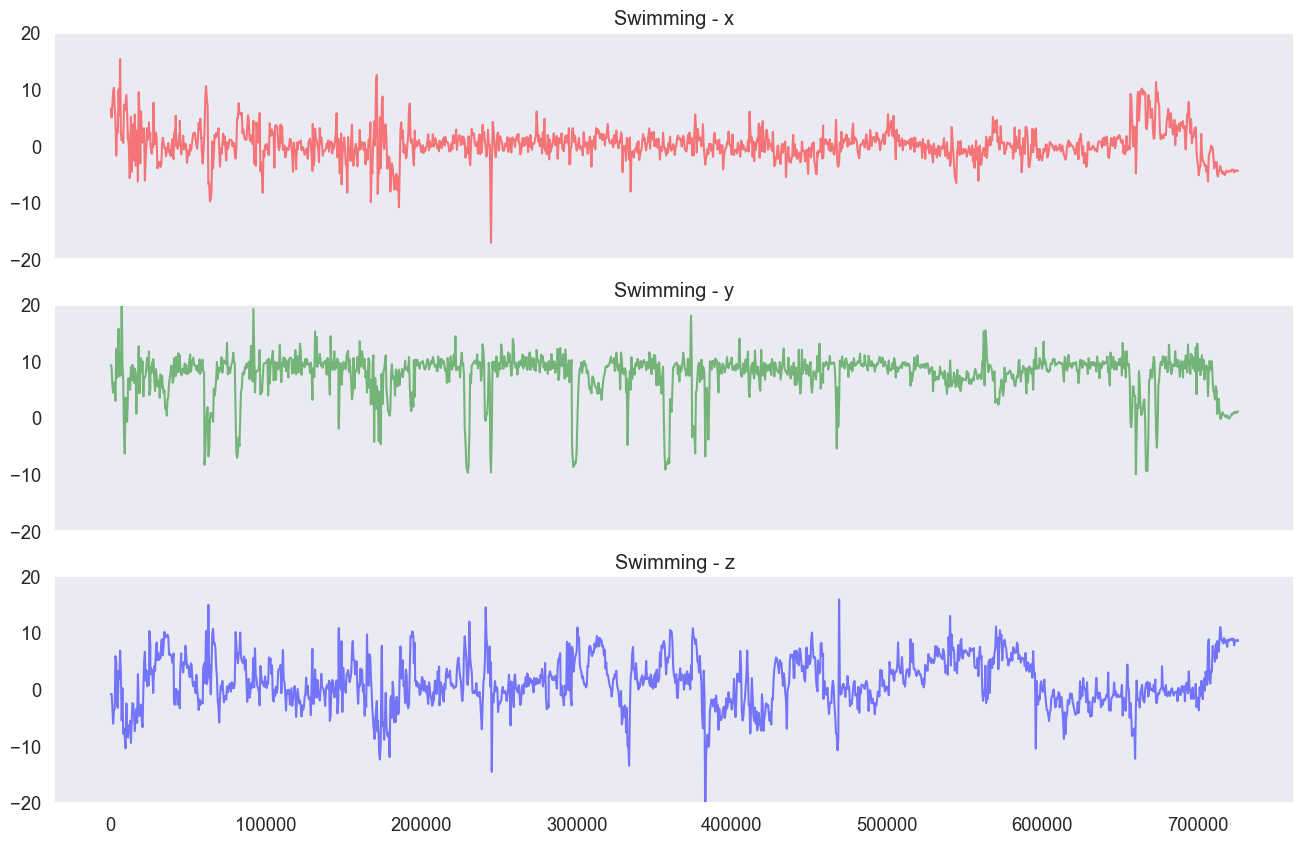

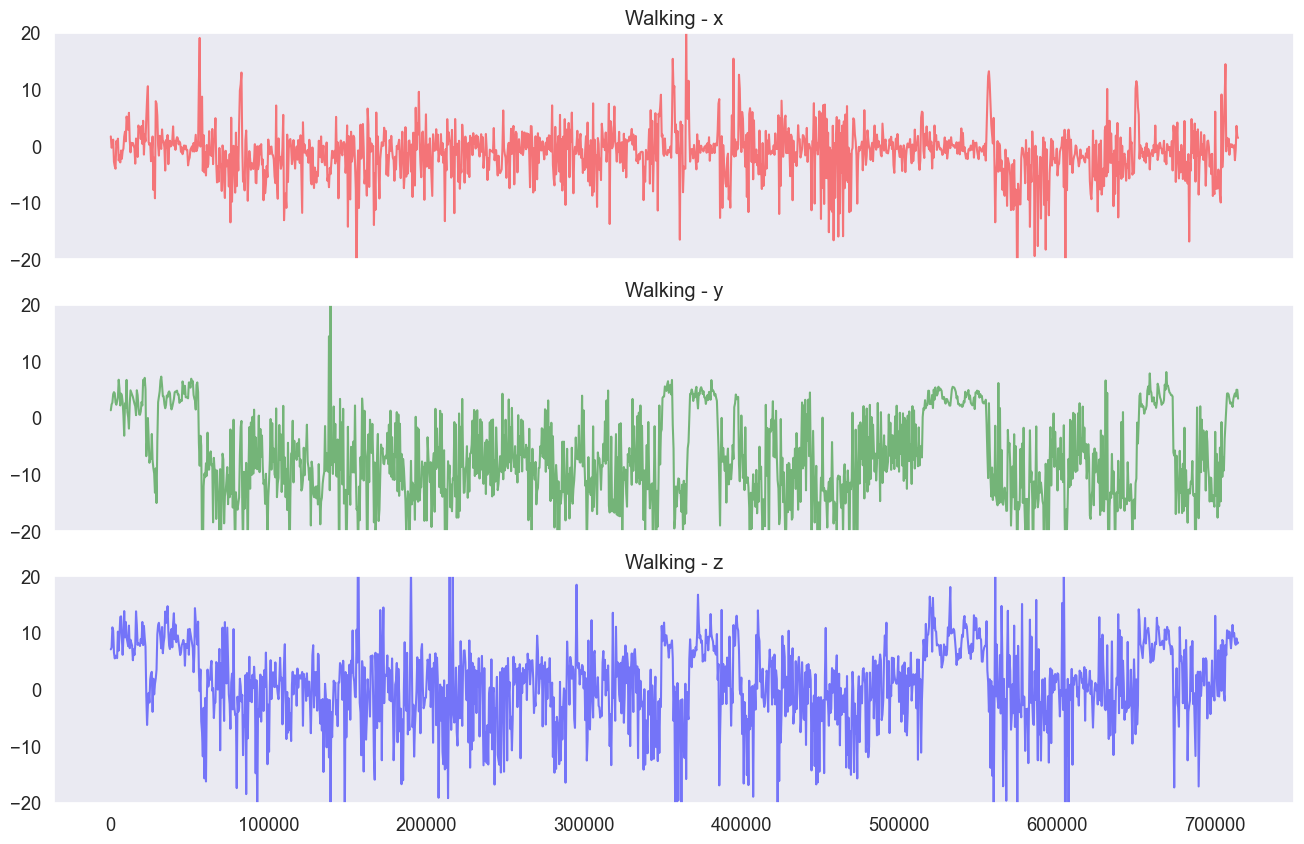

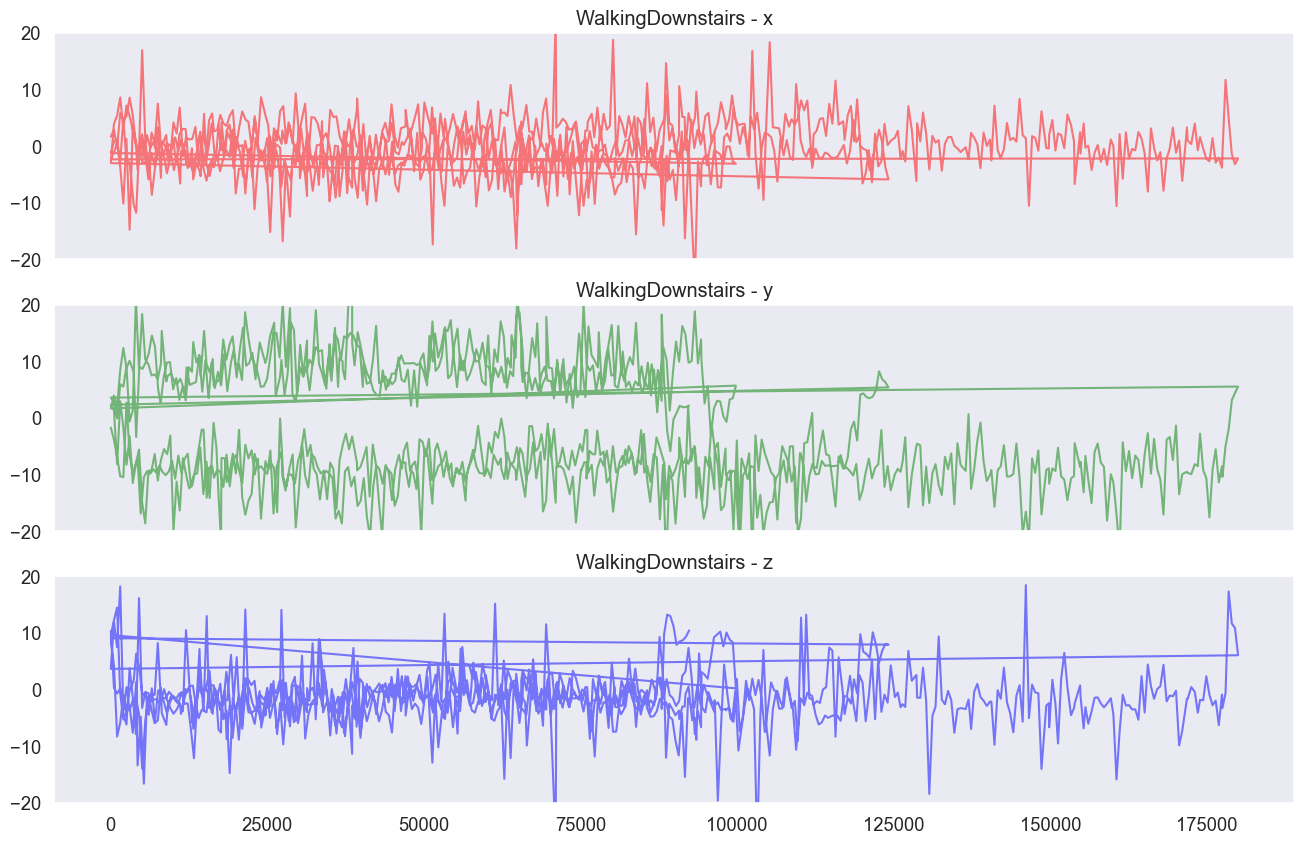

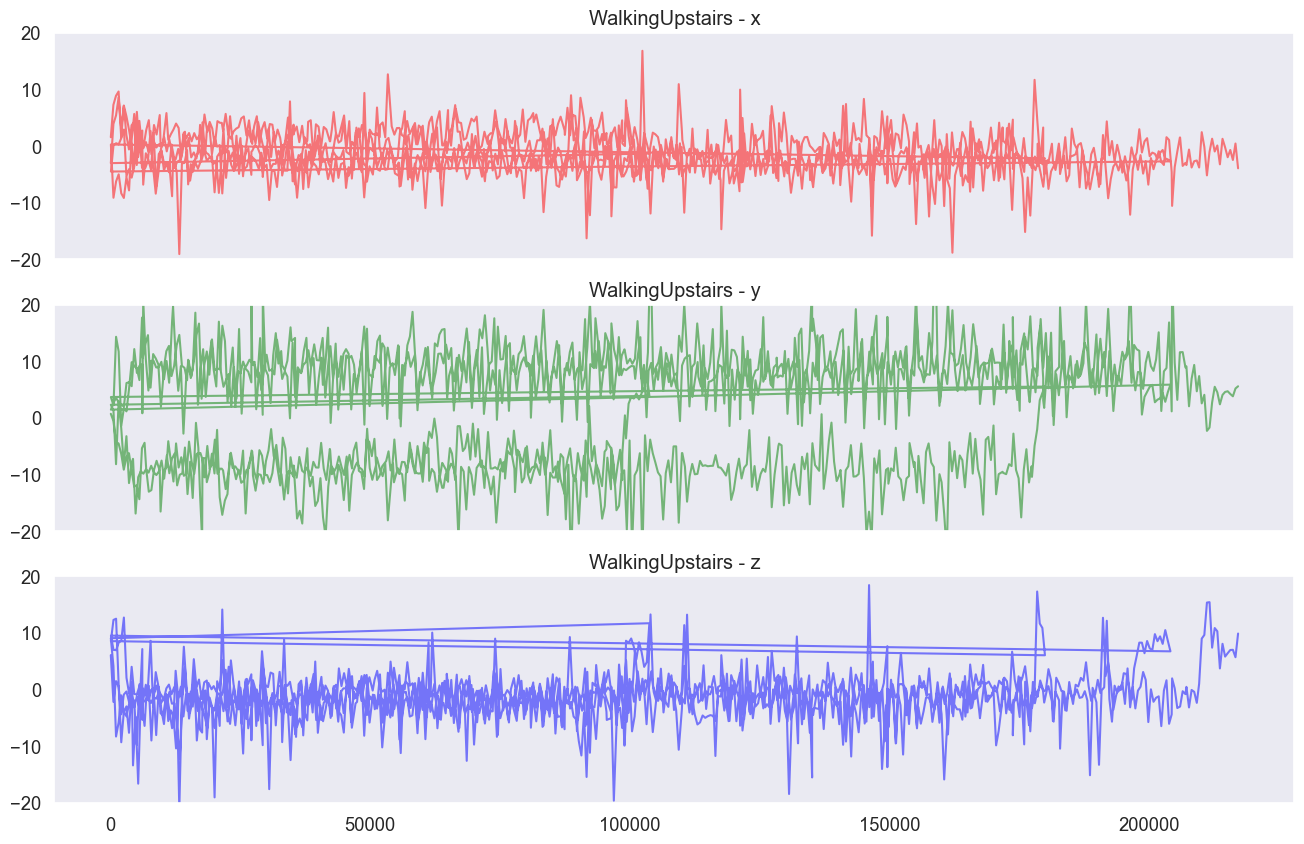

In [16]:
#Time Series Plot
for activity in df['activity'].unique():
    df_temp = df[df['activity'] == activity]
    df_temp.reset_index(inplace=True)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 10), sharex=True)
    
    time = df_temp['Time since start in ms '].values
    
    ax1.plot(time, df_temp['ACCELEROMETER X (m/s²)'], color='red', alpha=0.5)
    ax1.set_ylim(-20,20)
    ax1.set_title(activity + ' - x')
    ax1.grid()
    
    ax2.plot(time, df_temp['ACCELEROMETER Y (m/s²)'], color='green', alpha=0.5)
    ax2.set_ylim(-20,20)
    ax2.set_title(activity + ' - y')
    ax2.grid()

    ax3.plot(time, df_temp['ACCELEROMETER Z (m/s²)'], color='blue', alpha=0.5)
    ax3.set_ylim(-20,20)    
    ax3.set_title(activity + ' - z')
    ax3.grid()
    
    plt.show()

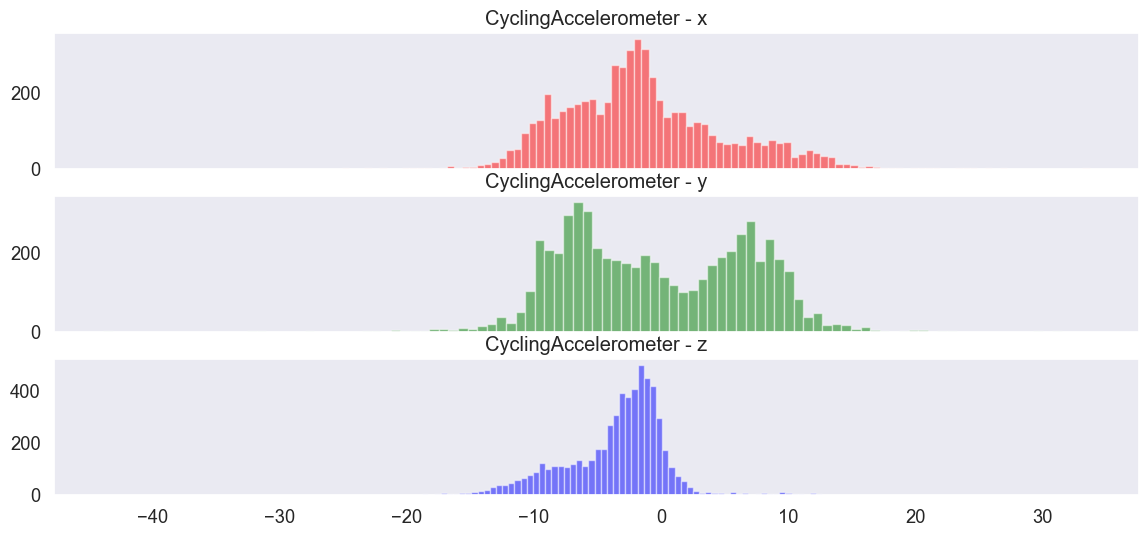

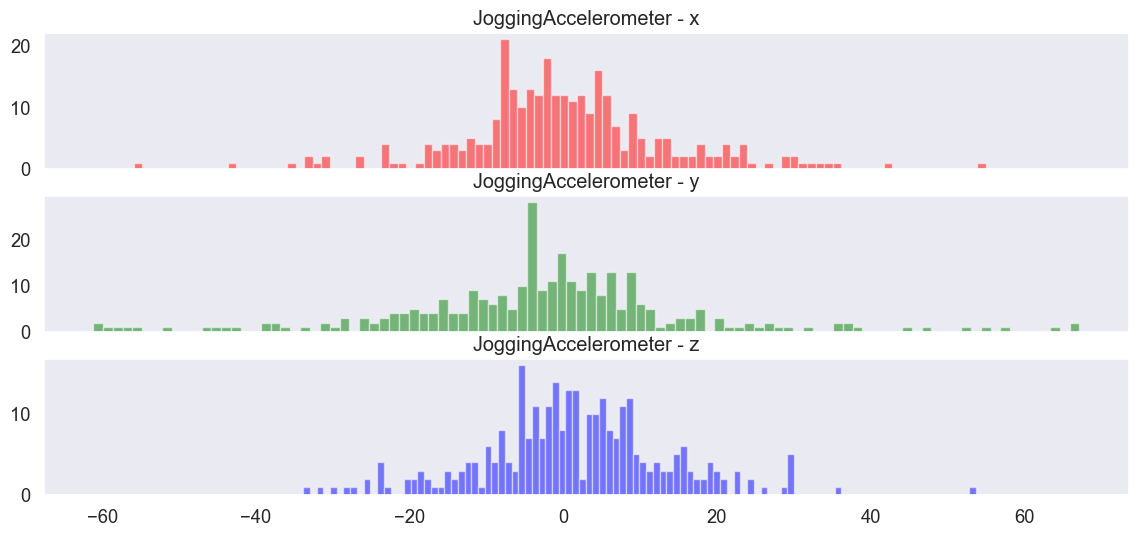

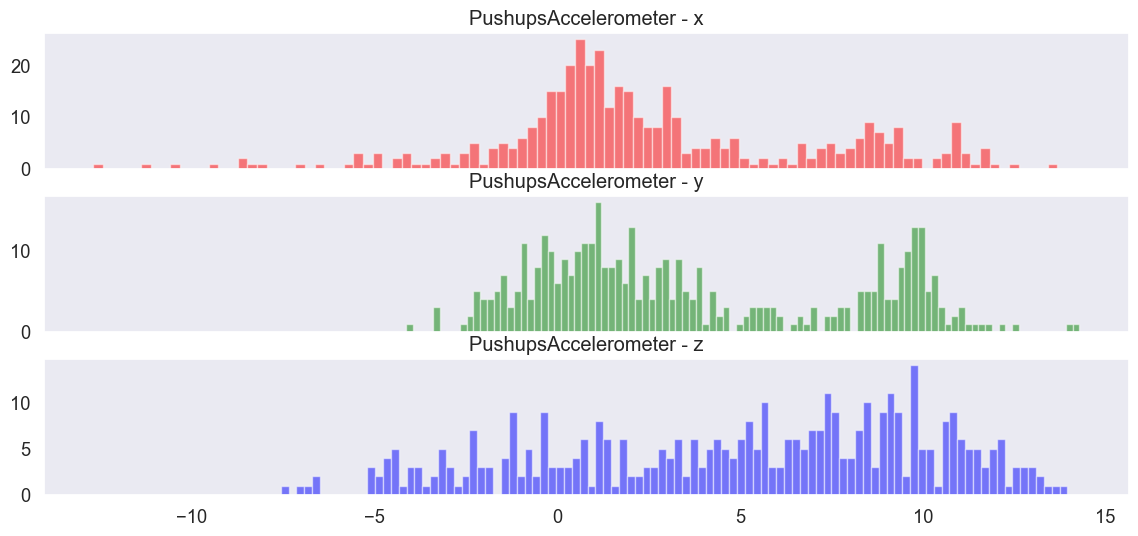

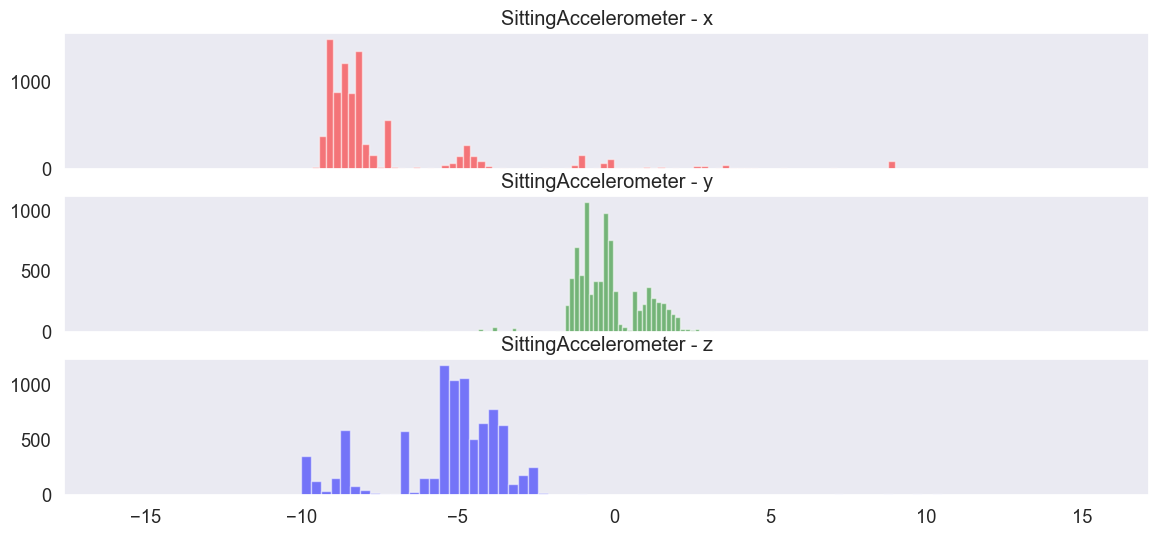

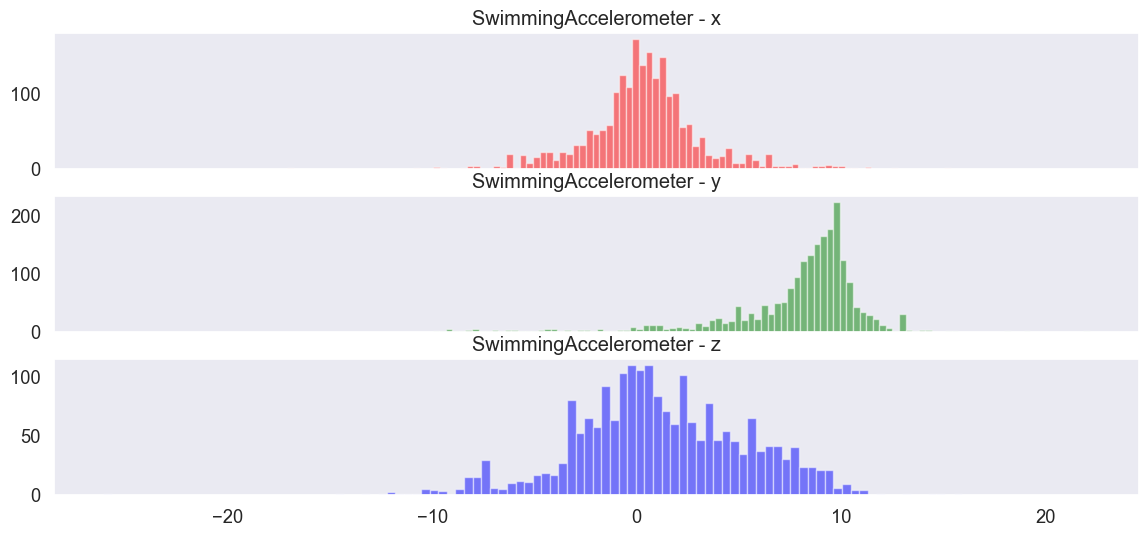

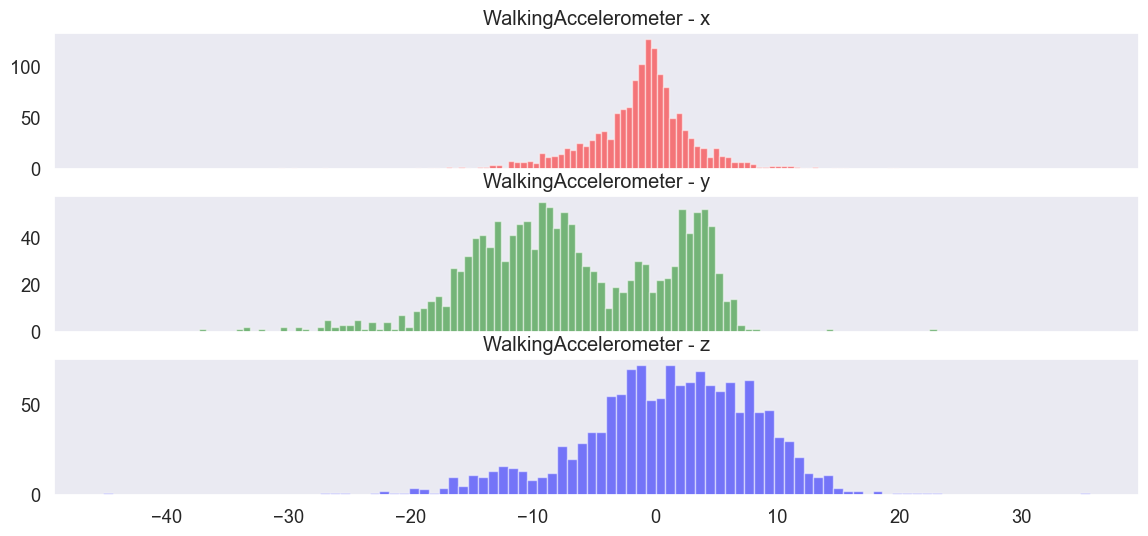

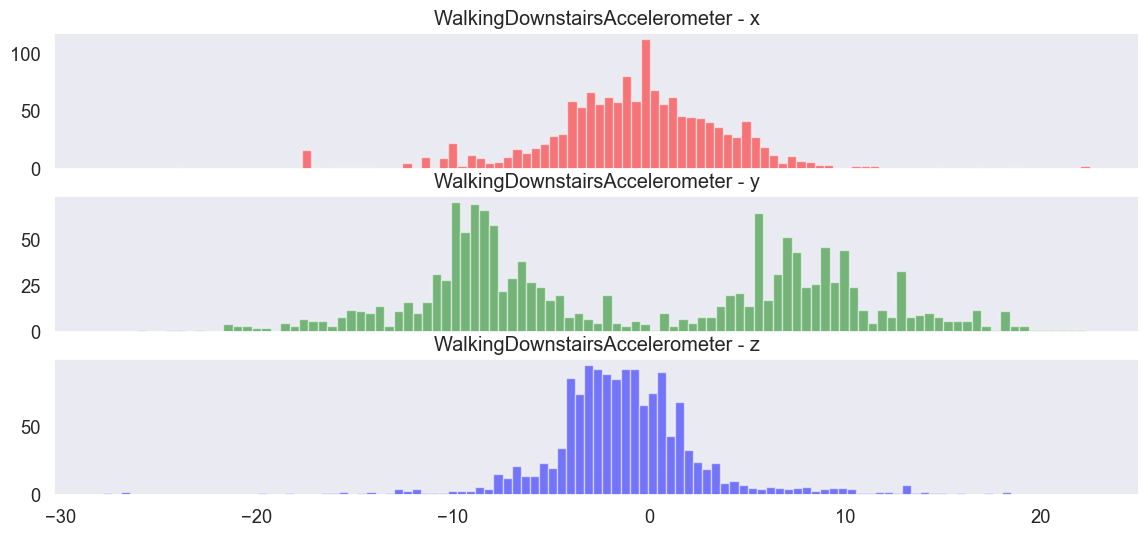

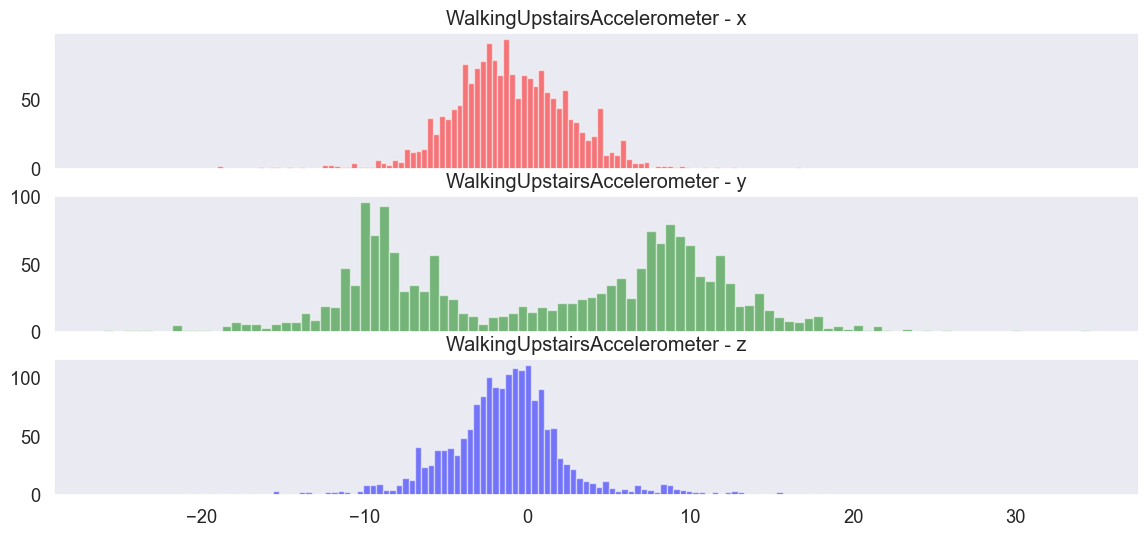

In [17]:
#Distribution Plot for Accelerometer
n_bins = 100

for activity in df['activity'].unique():
    df_temp = df[df['activity'] == activity]
    df_temp.reset_index(inplace=True)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 6), sharex=True)
    
    time = df_temp['Time since start in ms '].values
    
    ax1.hist( df_temp['ACCELEROMETER X (m/s²)'], bins=n_bins, color='red', alpha=0.5)
    # ax1.set_ylim(-20,20)
    ax1.set_title(activity + 'Accelerometer - x')
    ax1.grid()
    
    ax2.hist( df_temp['ACCELEROMETER Y (m/s²)'], bins=n_bins, color='green', alpha=0.5)
    # ax2.set_ylim(-20,20)
    ax2.set_title(activity + 'Accelerometer - y')
    ax2.grid()

    ax3.hist( df_temp['ACCELEROMETER Z (m/s²)'], bins=n_bins, color='blue', alpha=0.5)
    # ax3.set_ylim(-20,20)    
    ax3.set_title(activity + 'Accelerometer - z')
    ax3.grid()
    
    plt.show()
    

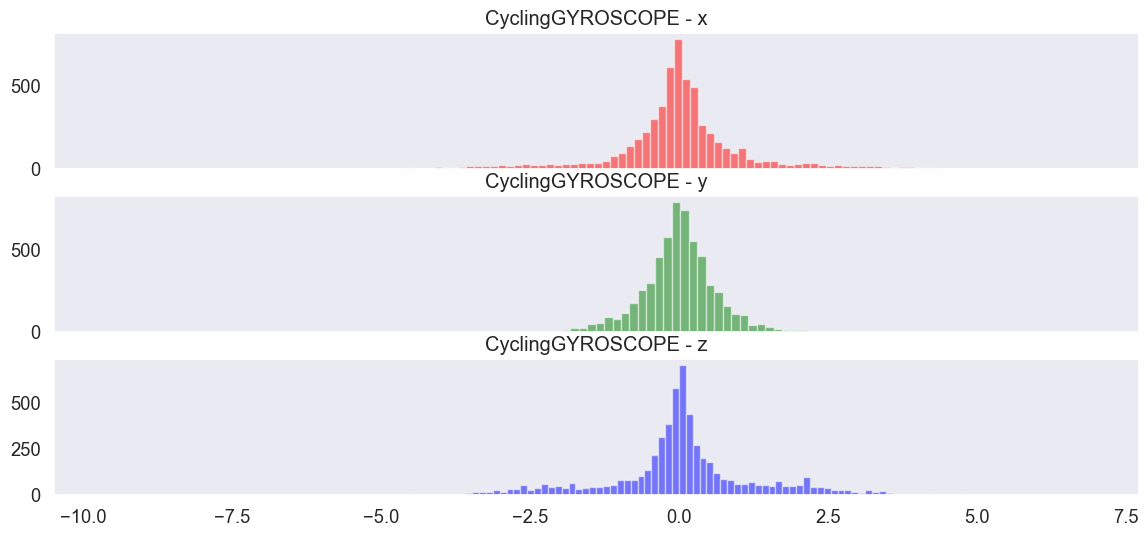

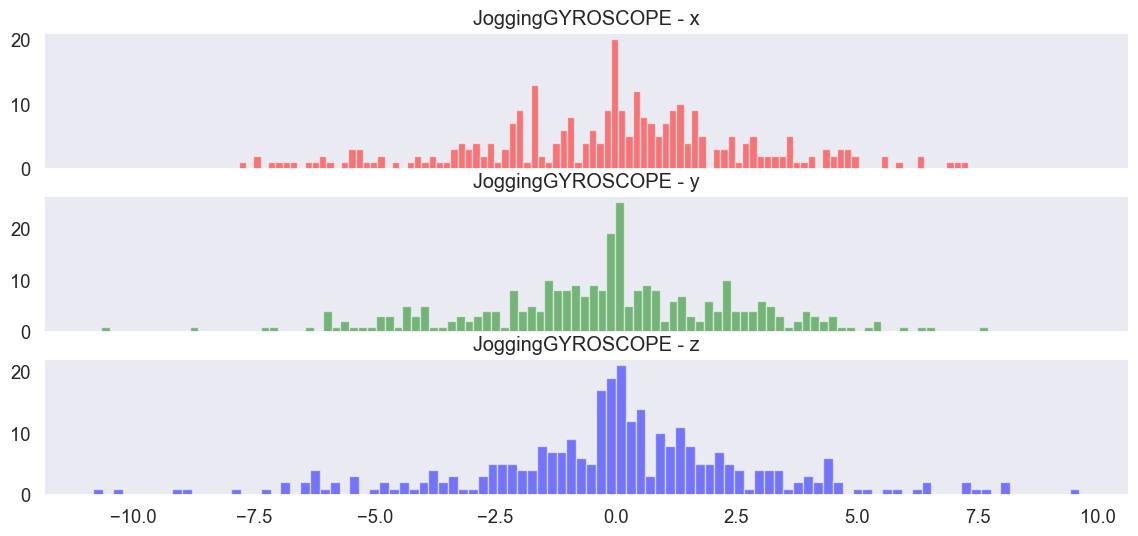

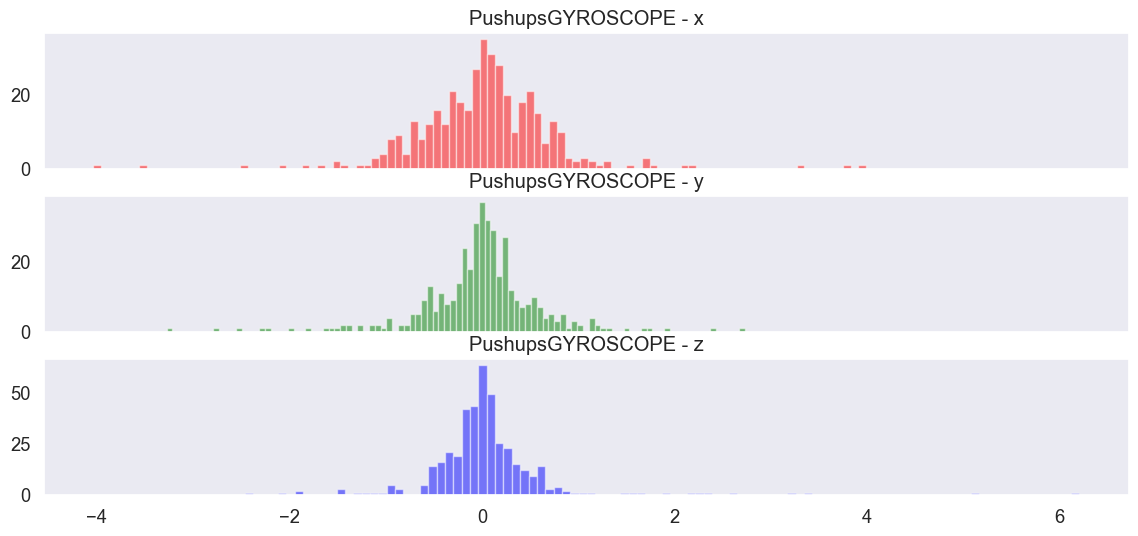

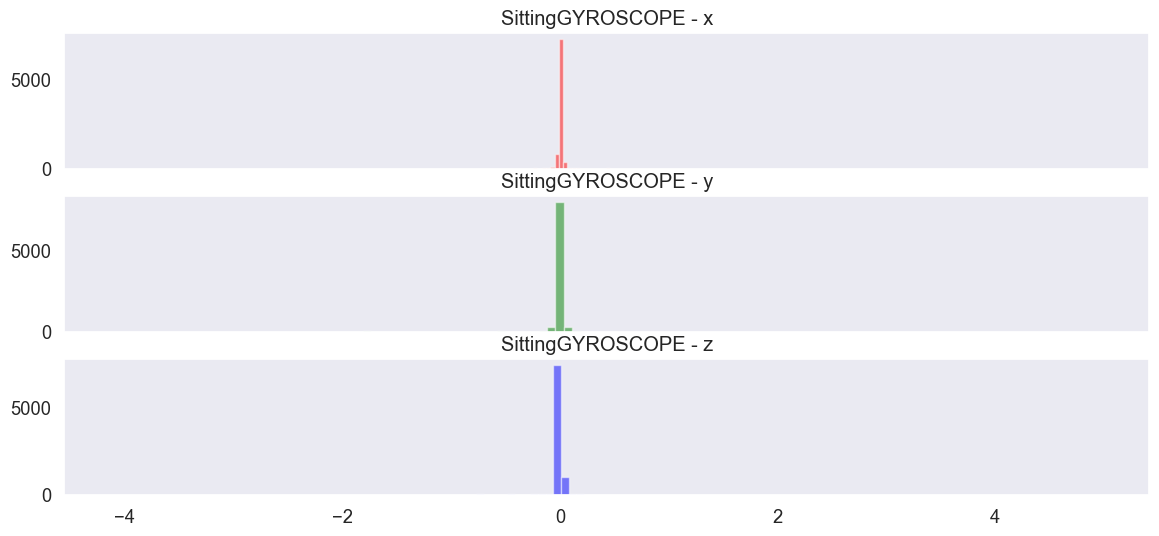

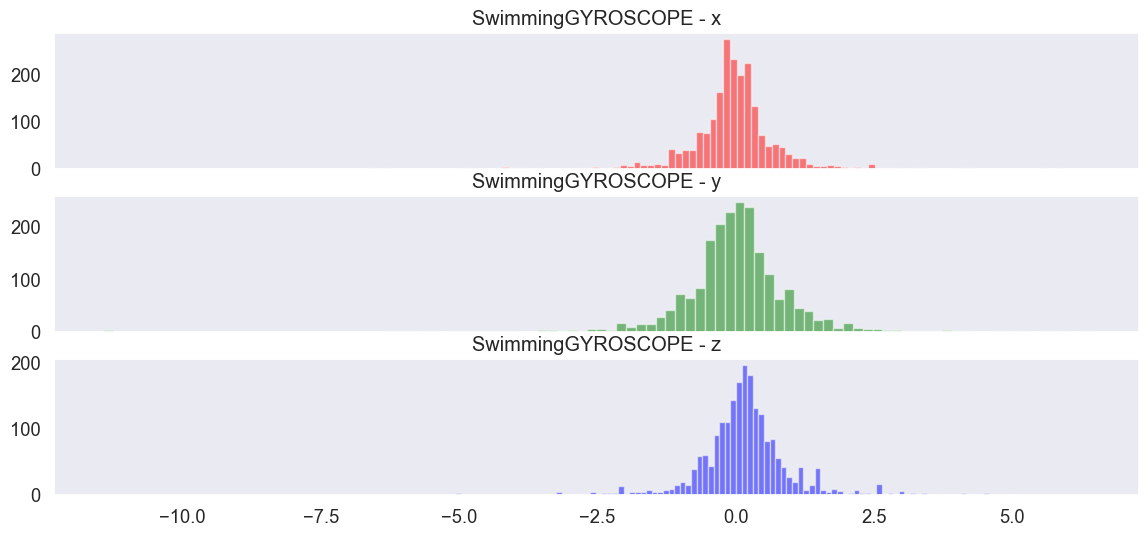

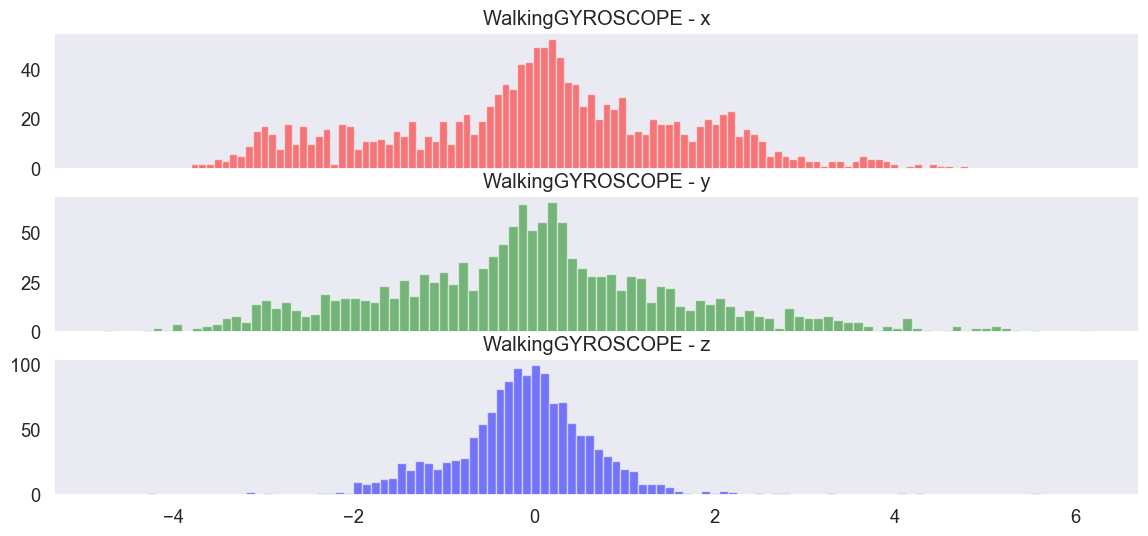

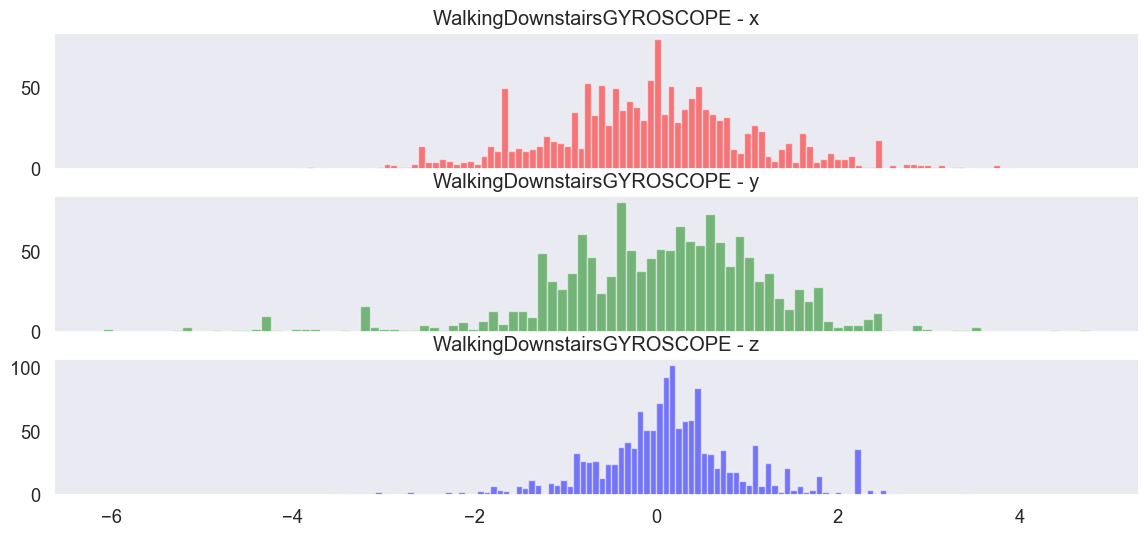

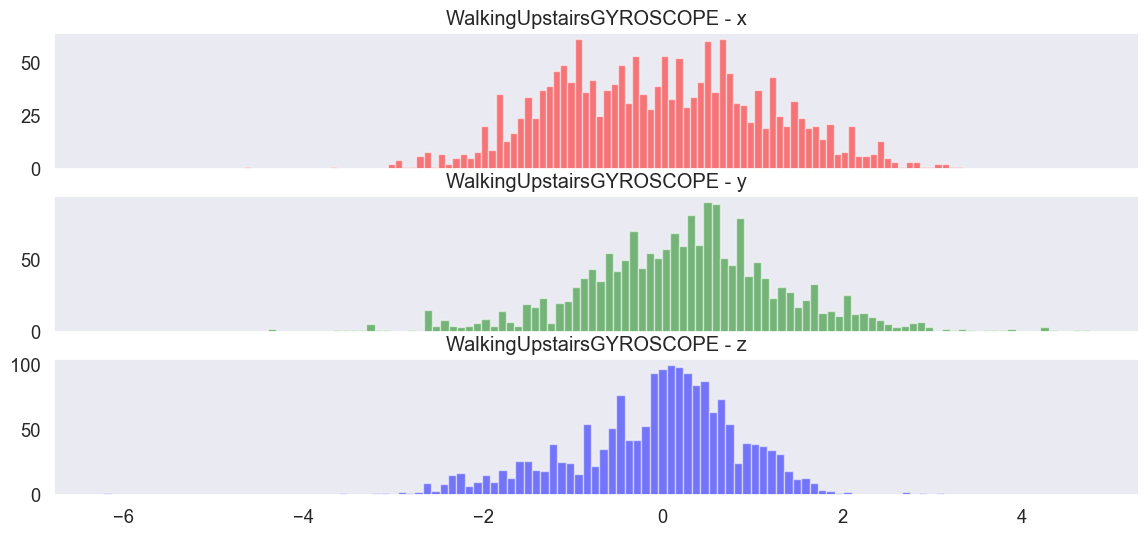

In [18]:
#Distribution Plot for GYROSCOPE
n_bins = 100

for activity in df['activity'].unique():
    df_temp = df[df['activity'] == activity]
    df_temp.reset_index(inplace=True)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 6), sharex=True)
    
    time = df_temp['Time since start in ms '].values
    
    ax1.hist( df_temp['GYROSCOPE X (rad/s)'], bins=n_bins, color='red', alpha=0.5)
    # ax1.set_ylim(-20,20)
    ax1.set_title(activity + 'GYROSCOPE - x')
    ax1.grid()
    
    ax2.hist( df_temp['GYROSCOPE Y (rad/s)'], bins=n_bins, color='green', alpha=0.5)
    # ax2.set_ylim(-20,20)
    ax2.set_title(activity + 'GYROSCOPE - y')
    ax2.grid()

    ax3.hist( df_temp['GYROSCOPE Z (rad/s)'], bins=n_bins, color='blue', alpha=0.5)
    # ax3.set_ylim(-20,20)    
    ax3.set_title(activity + 'GYROSCOPE - z')
    ax3.grid()
    
    plt.show()

Cycling :


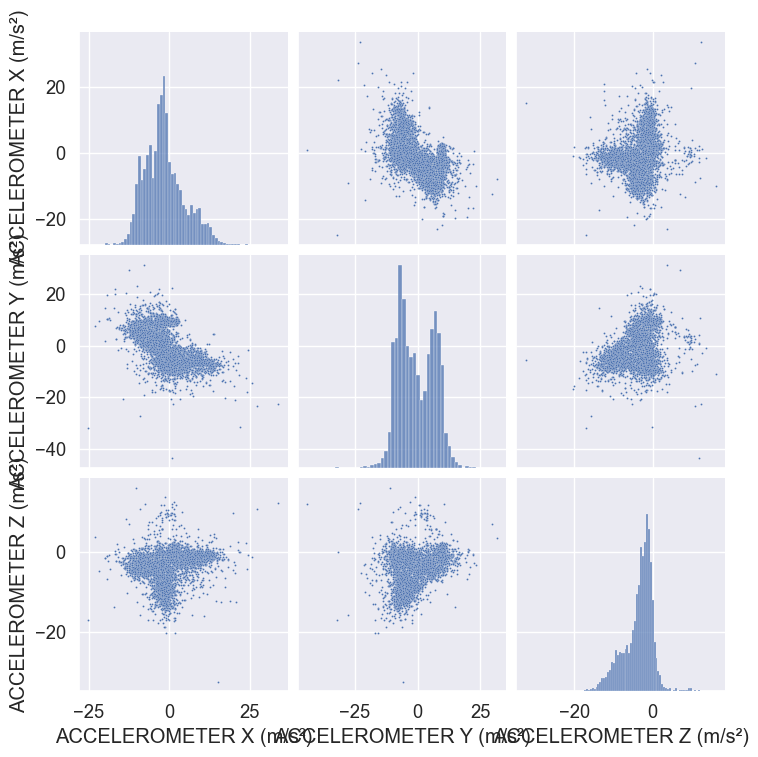

Jogging :


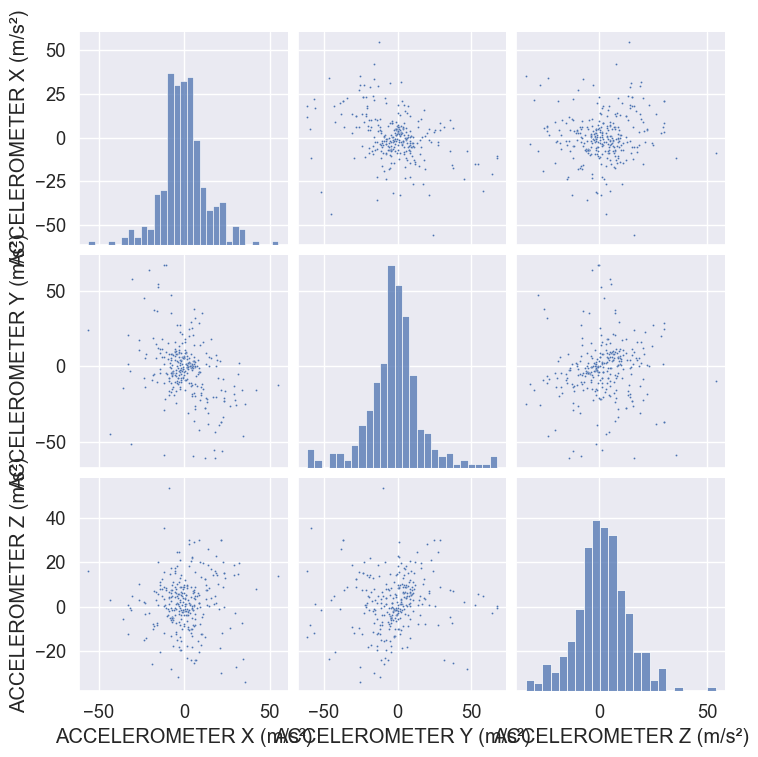

Pushups :


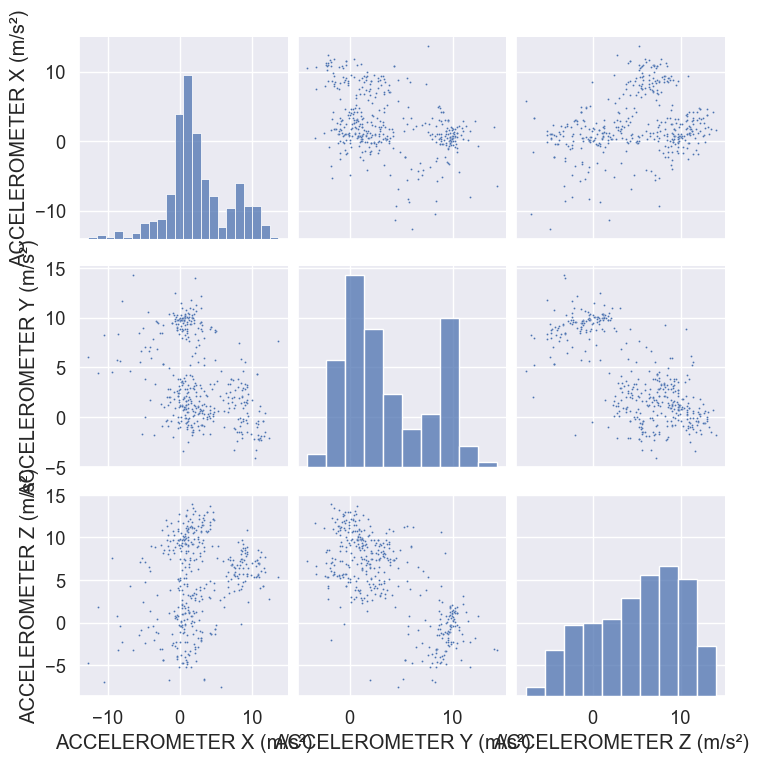

Sitting :


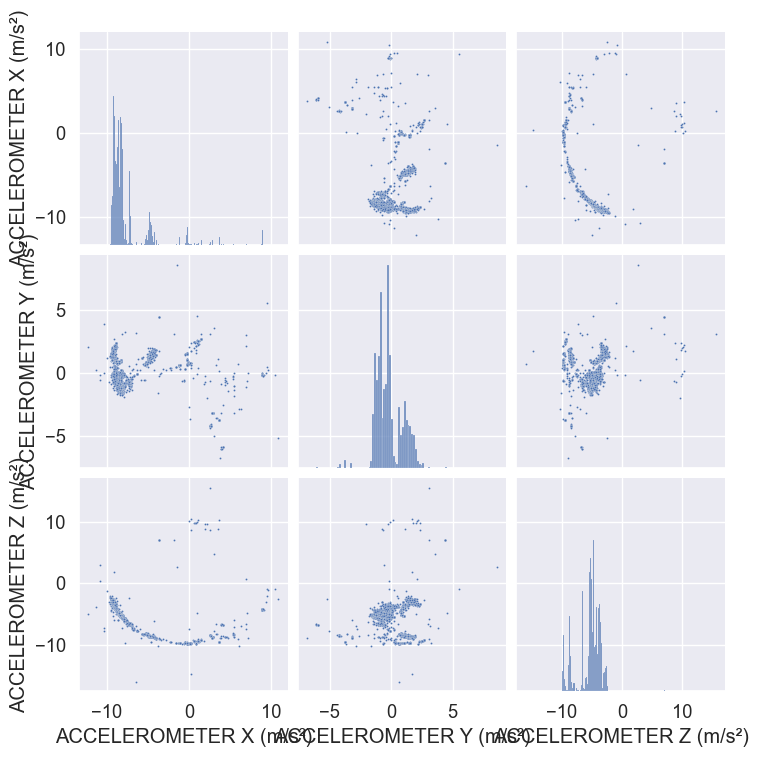

Swimming :


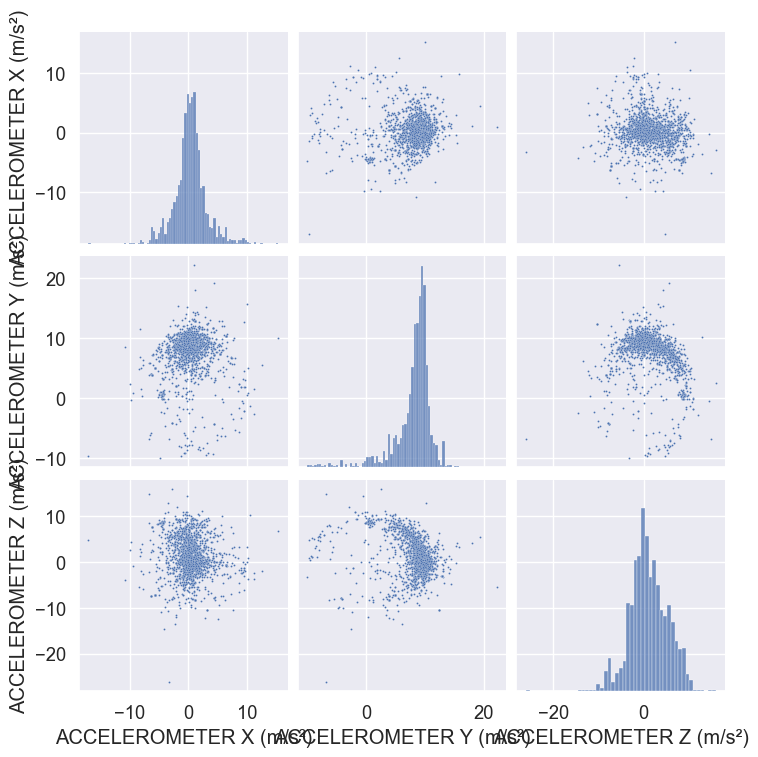

Walking :


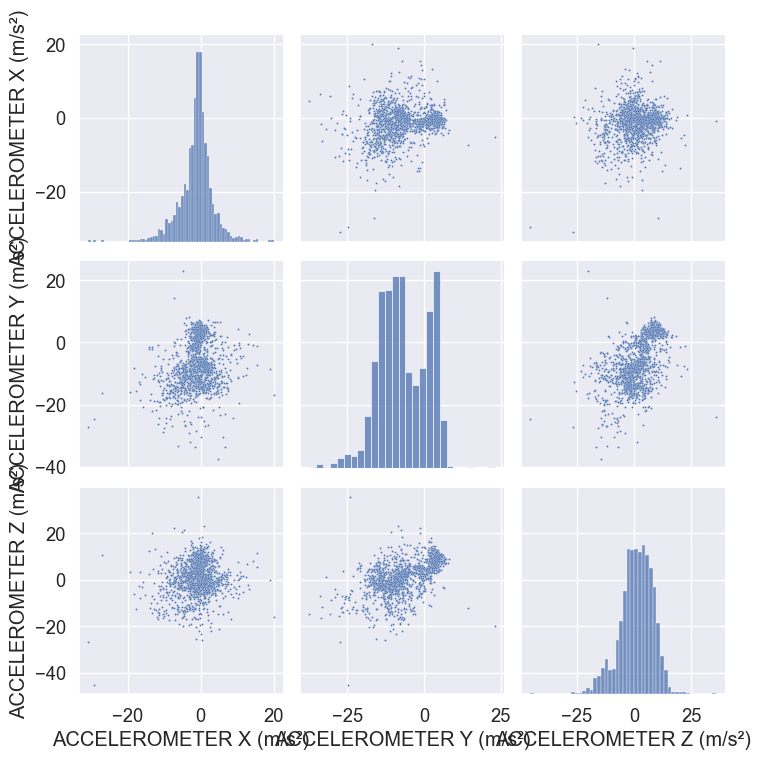

WalkingDownstairs :


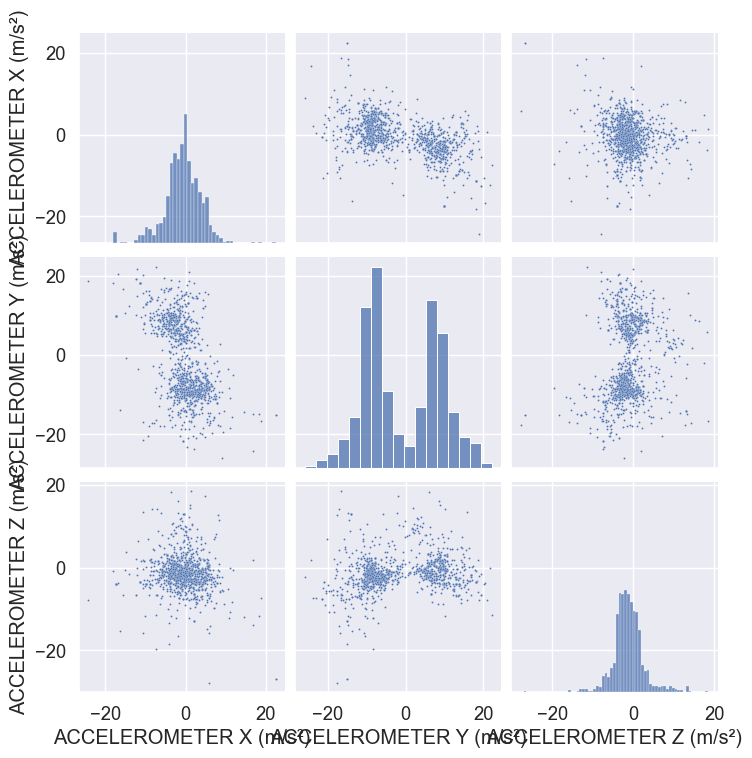

WalkingUpstairs :


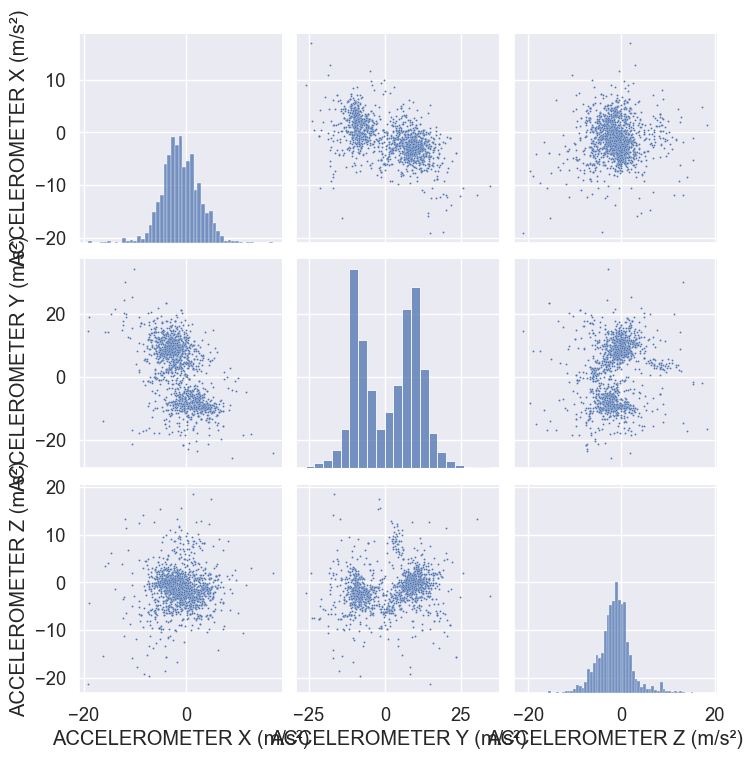

In [19]:
# distribution plot for Accelerometer
n_bins = 100

for activity in df['activity'].unique():
    df_temp = df[df['activity'] == activity]
    df_temp.reset_index(inplace=True)
    
    time = df_temp['Time since start in ms '].values
    print(activity, ':')
    # convert to seconds (currently in ms)
    time_s = time / 1000
    sns.pairplot(data = df_temp[['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)', 'ACCELEROMETER Z (m/s²)']], plot_kws=dict(s=2))
    plt.show()

In [20]:
#Remove the columns that are not required in Modeling
to_drop = df.columns[[-2,-3]]
to_drop

df.drop(to_drop, axis=1, inplace=True)
df.head()

ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                 -0.8857                 -0.9150                  9.5503   
1                 -0.8139                  1.2541                  9.4306   
2                -10.2466                -11.1079                 16.0610   
3                 -4.3679                 -7.6616                 -4.6180   
4                  5.0936                 -7.1863                 -5.2249   

   GRAVITY X (m/s²)  GRAVITY Y (m/s²)  GRAVITY Z (m/s²)  \
0           -1.1034           -0.0603            9.7442   
1           -0.5532            1.0615            9.7333   
2            0.9801            6.8492           -6.9497   
3            3.5523           -8.1039           -4.2283   
4            4.0020           -8.0153           -3.9886   

   LINEAR ACCELERATION X (m/s²)  LINEAR ACCELERATION Y (m/s²)  \
0                       -0.6645                        0.8831   
1                       -1.8757                        0.1955   
2                        4.7212                       -7.9441   
3                        2.8049                       -3.7581   
4                        5.1214                       -3.4253   

   LINEAR ACCELERATION Z (m/s²)  GYROSCOPE X (rad/s)  GYROSCOPE Y (rad/s)  \
0                        0.6781              -1.0842              -1.7585   
1                       -0.1211               0.2783              -0.5358   
2                       -9.0559              -1.0009              -2.9897   
3                       -7.1497               0.0703              -0.1928   
4                        3.9980              -0.4245               0.0546   

   GYROSCOPE Z (rad/s) activity  
0               0.1958  Cycling  
1               1.6936  Cycling  
2              -6.4581  Cycling  
3              -0.3580  Cycling  
4               0.3329  Cycling

In [21]:
df.shape

(22097, 13)

In [24]:
# Scaling
X = df.drop('activity', axis=1)

scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# Convert scaled data to a DataFrame
scaled_df = pd.DataFrame(X_s, columns=X.columns)
scaled_df.head()

ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                0.454075               -0.165197                2.642151   
1                0.466769                0.148357                2.616910   
2               -1.200886               -1.638634                4.015067   
3               -0.161561               -1.140453               -0.345526   
4                1.511185               -1.071746               -0.473504   

   GRAVITY X (m/s²)  GRAVITY Y (m/s²)  GRAVITY Z (m/s²)  \
0          0.466686         -0.066058          3.237706   
1          0.577318          0.124464          3.234948   
2          0.885627          1.107424         -0.986217   
3          1.402834         -1.432151         -0.297643   
4          1.493258         -1.417103         -0.236993   

   LINEAR ACCELERATION X (m/s²)  LINEAR ACCELERATION Y (m/s²)  \
0                     -0.248021                      0.323845   
1                     -0.730446                      0.093231   
2                      1.897122                     -2.636709   
3                      1.133853                     -1.232767   
4                      2.056523                     -1.121149   

   LINEAR ACCELERATION Z (m/s²)  GYROSCOPE X (rad/s)  GYROSCOPE Y (rad/s)  \
0                      0.254570            -1.149653            -2.042061   
1                     -0.068470             0.311410            -0.628887   
2                     -3.679955            -1.060327            -3.465059   
3                     -2.909461             0.088363            -0.232454   
4                      1.596488            -0.442230             0.053487   

   GYROSCOPE Z (rad/s)  
0             0.205138  
1             1.901637  
2            -7.331469  
3            -0.422129  
4             0.360426

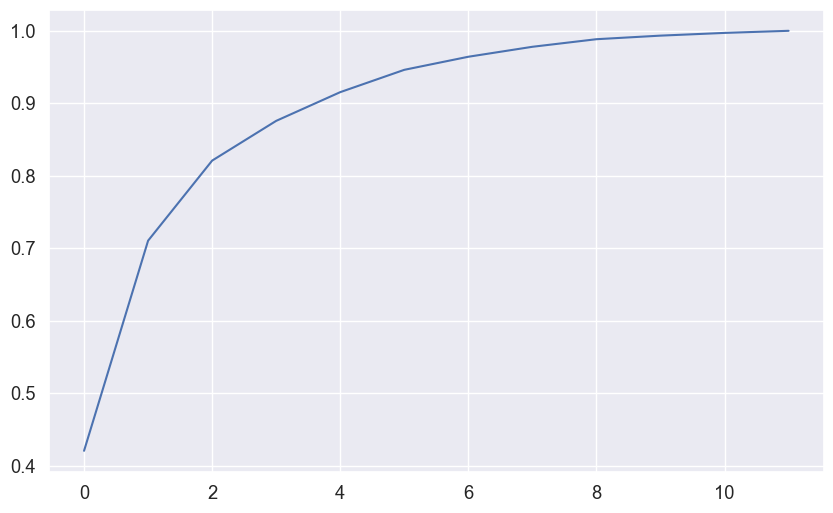

In [25]:
#PCA
pre_pca = PCA()
pre_pca_obj=pre_pca.fit(X)
pre_pca_obj.explained_variance_ratio_
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pre_pca_obj.explained_variance_ratio_))

In [26]:
pca = PCA(0.95)
data_set_pca = pca.fit_transform(X)
print("explained_variance_ratio_:", pca.explained_variance_ratio_)
print("Data:", data_set_pca)
print("Shape:", data_set_pca.shape)

explained_variance_ratio_: [0.42041568 0.289984   0.11049394 0.05483633 0.03962625 0.03080049
 0.01803729]
Data: [[  0.09626339 -12.38513191  13.16397508 ...  -0.75439129   1.81693459
    1.36617125]
 [ -1.9641727  -13.16125056  12.24979639 ...  -2.23558262   1.5039292
    0.69993716]
 [  2.64819749  -3.77688611  13.18334936 ...  -0.61381798  -4.76253394
   -1.46015063]
 ...
 [ -5.99527174 -11.23290212   9.75450286 ...  -2.64322061   2.2629321
    0.64845706]
 [ -6.4222759  -12.83992901   6.7860703  ...  -0.61108178   4.40630586
    0.32689326]
 [ -8.58488819 -11.44293951  11.89975437 ...  -1.44547837  -1.38207083
    0.6237712 ]]
Shape: (22097, 7)


## Considering the Random Sample without any Balancing techniques

In [28]:
# assuming your data is stored in a pandas DataFrame called `df`
X = df.drop('activity', axis=1)
pca = PCA(0.95)
X_scaled_pca = pca.fit_transform(X)
y = df['activity'].values

# Split the data into training and testing sets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17677, 7)
X_test shape: (4420, 7)
y_train shape: (17677,)
y_test shape: (4420,)


In [29]:
fig = px.histogram(pd.DataFrame(y_train,columns=['activity']), x='activity', title='Training Data concerning each activity', color="activity")
fig.show()

## KNN

In [30]:
# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

for train_index, test_index in kf.split(X_scaled_pca):
    X_fold_train, X_fold_test = X_scaled_pca[train_index], X_scaled_pca[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]
    
    # KNN Classification
    knn = KNeighborsClassifier()
    
    # Train the model using the training sets
    knn.fit(X_fold_train, y_fold_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_fold_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)
    
# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set
knn_final = KNeighborsClassifier()
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

# Calculate accuracy score
knn_acc = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(knn_acc * 100))
print(classification_report(y_test, y_pred_final))

Average K-fold Accuracy: 85.69%
Final Test Set Accuracy: 86.31%
                   precision    recall  f1-score   support

          Cycling       0.86      0.90      0.88      1157
          Jogging       0.88      0.45      0.60        62
          Pushups       0.76      0.63      0.69       111
          Sitting       0.99      1.00      0.99      1769
         Swimming       0.83      0.88      0.86       391
          Walking       0.84      0.85      0.84       306
WalkingDownstairs       0.48      0.43      0.45       282
  WalkingUpstairs       0.59      0.54      0.56       342

         accuracy                           0.86      4420
        macro avg       0.78      0.71      0.73      4420
     weighted avg       0.86      0.86      0.86      4420



In [31]:
y_test = pd.Series(y_test)
results = pd.DataFrame(columns=['accuracy'], index=y_test.unique())

                    accuracy
Sitting            99.717354
Cycling            92.739844
Walking            88.888889
Swimming           91.048593
WalkingDownstairs  63.475177
WalkingUpstairs    63.157895
Pushups            72.072072
Jogging            61.290323


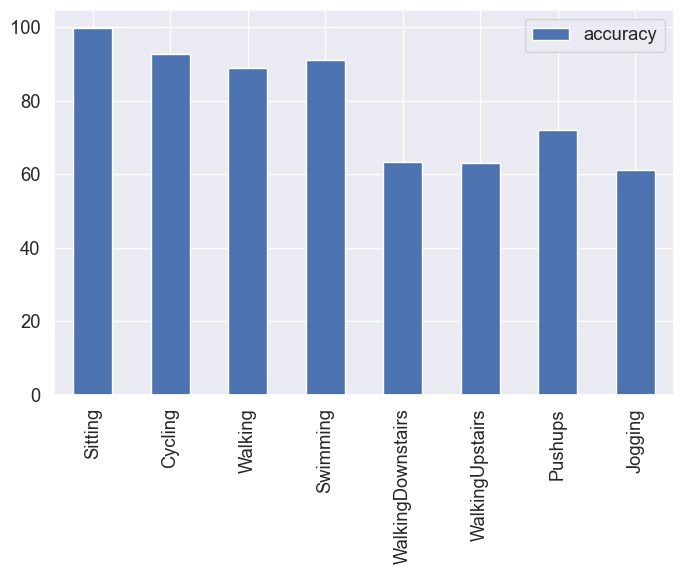

In [32]:
for activity in results.index:
    X_test_new = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_new = y_test.reset_index(drop=True)

    # filter X_test based on y_test values
    X_test_filtered = X_test_new[y_test_new==activity]
    # use the model to predict the activity
    y_predict = knn.predict(X_test_filtered)

    # get accuracy
    accuracy = accuracy_score(y_test_new[y_test_new==activity], y_predict)

    results.loc[activity, 'accuracy'] = accuracy*100

print(results)
results.plot(kind='bar', figsize=(8, 5))
plt.show()

## Linear SVM

In [33]:
# Linear SVM Classifier
svm_lin = LinearSVC(random_state=42)

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

for train_index, test_index in kf.split(X_scaled_pca):
    X_fold_train, X_fold_test = X_scaled_pca[train_index], X_scaled_pca[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]
    
    # Train the classifier on the training data
    svm_lin.fit(X_fold_train, y_fold_train)
    
    # Make predictions on the test data
    y_pred = svm_lin.predict(X_fold_test)
    
    # Calculate accuracy of the classifier
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set
svm_lin_final = LinearSVC(random_state=42)
svm_lin_final.fit(X_train, y_train)
y_pred_final = svm_lin_final.predict(X_test)

# Calculate accuracy of the classifier on the test set
l_svm_acc = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(l_svm_acc * 100))
print(classification_report(y_test, y_pred_final))

Average K-fold Accuracy: 59.46%
Final Test Set Accuracy: 59.19%
                   precision    recall  f1-score   support

          Cycling       0.45      0.39      0.42      1157
          Jogging       0.75      0.05      0.09        62
          Pushups       0.00      0.00      0.00       111
          Sitting       0.71      0.95      0.81      1769
         Swimming       0.50      0.87      0.64       391
          Walking       0.45      0.50      0.47       306
WalkingDownstairs       0.00      0.00      0.00       282
  WalkingUpstairs       0.05      0.01      0.01       342

         accuracy                           0.59      4420
        macro avg       0.36      0.34      0.31      4420
     weighted avg       0.49      0.59      0.52      4420



                    accuracy
Sitting            94.629734
Cycling            37.856525
Walking            68.300654
Swimming           83.120205
WalkingDownstairs        0.0
WalkingUpstairs          0.0
Pushups                  0.0
Jogging                  0.0


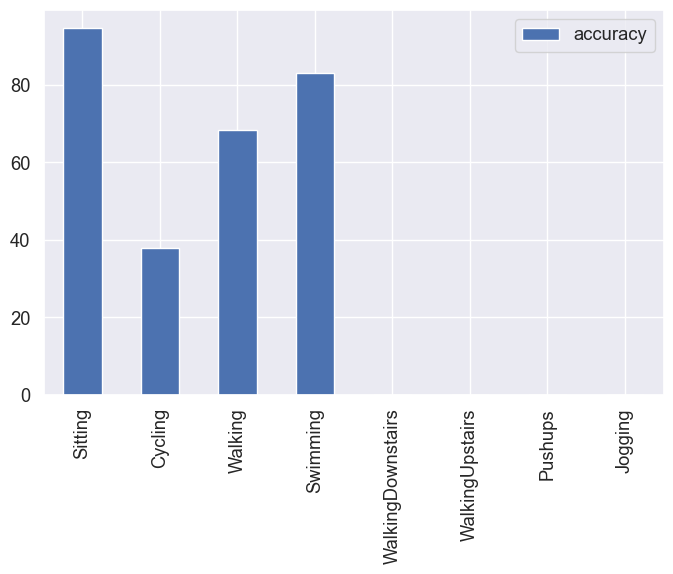

In [34]:
for activity in results.index:
    X_test_new = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_new = y_test.reset_index(drop=True)

    # filter X_test based on y_test values
    X_test_filtered = X_test_new[y_test_new==activity]
    # use the model to predict the activity
    y_predict = svm_lin.predict(X_test_filtered)

    # get accuracy
    accuracy = accuracy_score(y_test_new[y_test_new==activity], y_predict)

    results.loc[activity, 'accuracy'] = accuracy*100

print(results)
results.plot(kind='bar', figsize=(8, 5))
plt.show()

## RBF SVM

In [35]:
# RBF SVM Classifier
svm_rbf = SVC(kernel='rbf')

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

for train_index, test_index in kf.split(X_scaled_pca):
    X_fold_train, X_fold_test = X_scaled_pca[train_index], X_scaled_pca[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]
    
    # Train the classifier on the training data
    svm_rbf.fit(X_fold_train, y_fold_train)
    
    # Make predictions on the test data
    y_pred = svm_rbf.predict(X_fold_test)
    
    # Calculate accuracy of the classifier
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set
svm_rbf_final = SVC(kernel='rbf')
svm_rbf_final.fit(X_train, y_train)
y_pred_final = svm_rbf_final.predict(X_test)

# Calculate accuracy of the classifier on the test set
rbf_svm_acc = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(rbf_svm_acc * 100))
print(classification_report(y_test, y_pred_final))

Average K-fold Accuracy: 83.76%
Final Test Set Accuracy: 83.85%
                   precision    recall  f1-score   support

          Cycling       0.81      0.85      0.83      1157
          Jogging       0.88      0.69      0.77        62
          Pushups       0.78      0.57      0.66       111
          Sitting       0.98      1.00      0.99      1769
         Swimming       0.82      0.86      0.84       391
          Walking       0.78      0.89      0.83       306
WalkingDownstairs       0.50      0.24      0.33       282
  WalkingUpstairs       0.46      0.51      0.48       342

         accuracy                           0.84      4420
        macro avg       0.75      0.70      0.72      4420
     weighted avg       0.83      0.84      0.83      4420



                    accuracy
Sitting            99.660825
Cycling             85.73898
Walking            91.503268
Swimming           86.189258
WalkingDownstairs  33.687943
WalkingUpstairs    48.538012
Pushups            57.657658
Jogging            75.806452


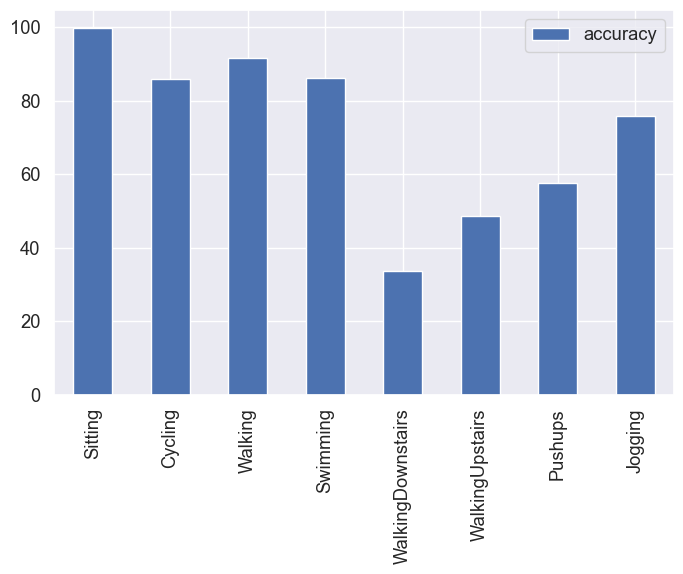

In [36]:
for activity in results.index:
    X_test_new = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_new = y_test.reset_index(drop=True)

    # filter X_test based on y_test values
    X_test_filtered = X_test_new[y_test_new==activity]
    # use the model to predict the activity
    y_predict = svm_rbf.predict(X_test_filtered)

    # get accuracy
    accuracy = accuracy_score(y_test_new[y_test_new==activity], y_predict)

    results.loc[activity, 'accuracy'] = accuracy*100

print(results)
results.plot(kind='bar', figsize=(8, 5))
plt.show()

## DT

In [37]:
# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

for train_index, test_index in kf.split(X_scaled_pca):
    X_fold_train, X_fold_test = X_scaled_pca[train_index], X_scaled_pca[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]
    
    # Train the classifier on the training data
    tree.fit(X_fold_train, y_fold_train)
    
    # Make predictions on the test data
    y_pred = tree.predict(X_fold_test)
    
    # Calculate accuracy of the classifier
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)
    
# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set
tree_final = DecisionTreeClassifier(random_state=42)
tree_final.fit(X_train, y_train)
y_pred_final = tree_final.predict(X_test)

# Calculate accuracy of the classifier on the test set
dt_acc = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(dt_acc * 100))
print(classification_report(y_test, y_pred_final))

Average K-fold Accuracy: 82.31%
Final Test Set Accuracy: 82.85%
                   precision    recall  f1-score   support

          Cycling       0.86      0.86      0.86      1157
          Jogging       0.46      0.35      0.40        62
          Pushups       0.64      0.55      0.59       111
          Sitting       0.99      0.99      0.99      1769
         Swimming       0.79      0.83      0.81       391
          Walking       0.81      0.74      0.77       306
WalkingDownstairs       0.40      0.41      0.40       282
  WalkingUpstairs       0.47      0.49      0.48       342

         accuracy                           0.83      4420
        macro avg       0.68      0.65      0.66      4420
     weighted avg       0.83      0.83      0.83      4420



                    accuracy
Sitting                100.0
Cycling                100.0
Walking                100.0
Swimming               100.0
WalkingDownstairs   98.58156
WalkingUpstairs    84.210526
Pushups                100.0
Jogging                100.0


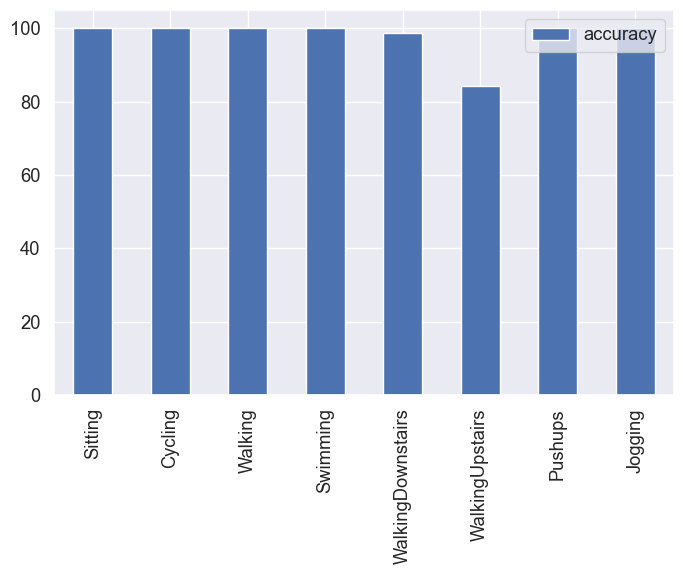

In [38]:
for activity in results.index:
    X_test_new = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_new = y_test.reset_index(drop=True)

    # filter X_test based on y_test values
    X_test_filtered = X_test_new[y_test_new==activity]
    # use the model to predict the activity
    y_predict = tree.predict(X_test_filtered)

    # get accuracy
    accuracy = accuracy_score(y_test_new[y_test_new==activity], y_predict)

    results.loc[activity, 'accuracy'] = accuracy*100

print(results)
results.plot(kind='bar', figsize=(8, 5))
plt.show()

## RF

In [39]:
# Random Forest Classifier
forest = RandomForestClassifier(random_state=42)

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

for train_index, test_index in kf.split(X_scaled_pca):
    X_fold_train, X_fold_test = X_scaled_pca[train_index], X_scaled_pca[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]
    
    # Train the classifier on the training data
    forest.fit(X_fold_train, y_fold_train)
    
    # Make predictions on the test data
    y_pred = forest.predict(X_fold_test)
    
    # Calculate accuracy of the classifier
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set
forest_final = RandomForestClassifier(random_state=42)
forest_final.fit(X_train, y_train)
y_pred_final = forest_final.predict(X_test)

# Calculate accuracy of the classifier on the test set
rf_acc = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(rf_acc * 100))
print(classification_report(y_test, y_pred_final))

Average K-fold Accuracy: 86.59%
Final Test Set Accuracy: 86.74%
                   precision    recall  f1-score   support

          Cycling       0.86      0.92      0.89      1157
          Jogging       0.89      0.50      0.64        62
          Pushups       0.79      0.60      0.68       111
          Sitting       1.00      0.99      1.00      1769
         Swimming       0.85      0.89      0.87       391
          Walking       0.82      0.90      0.85       306
WalkingDownstairs       0.52      0.36      0.43       282
  WalkingUpstairs       0.53      0.57      0.55       342

         accuracy                           0.87      4420
        macro avg       0.78      0.72      0.74      4420
     weighted avg       0.86      0.87      0.86      4420



                    accuracy
Sitting                100.0
Cycling                100.0
Walking                100.0
Swimming               100.0
WalkingDownstairs  85.106383
WalkingUpstairs    91.520468
Pushups                100.0
Jogging                100.0


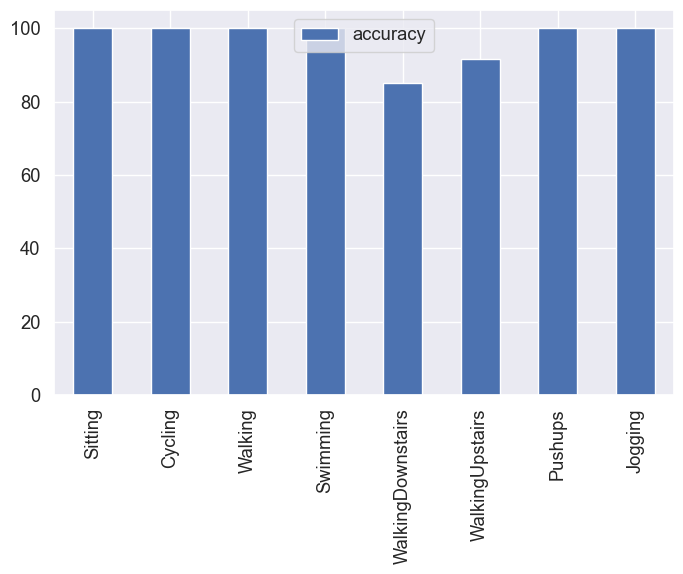

In [40]:
for activity in results.index:
    X_test_new = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_new = y_test.reset_index(drop=True)

    # filter X_test based on y_test values
    X_test_filtered = X_test_new[y_test_new==activity]
    # use the model to predict the activity
    y_predict = forest.predict(X_test_filtered)

    # get accuracy
    accuracy = accuracy_score(y_test_new[y_test_new==activity], y_predict)

    results.loc[activity, 'accuracy'] = accuracy*100

print(results)
results.plot(kind='bar', figsize=(8, 5))
plt.show()

In [41]:
# select a random activity from y_test
activity = y_test.sample().iloc[0]

# reset the index of X_test and y_test
X_test = pd.DataFrame(X_test).reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# filter X_test based on y_test values
X_test_filtered = X_test[y_test == activity]
# randomly select 1 row
X_test_filtered = X_test_filtered.sample(n=1)

# use the models to predict the activity
knn_predict = knn.predict(X_test_filtered)
svm_lin_predict = svm_lin.predict(X_test_filtered)
svm_rbf_predict = svm_rbf.predict(X_test_filtered)
dt_predict = tree.predict(X_test_filtered)
rf_predict = forest.predict(X_test_filtered)

# print the predicted activity for each model and the actual activity
print('KNN Predicted activity: ', knn_predict[0])
print('SVM Linear Predicted activity: ', svm_lin_predict[0])
print('SVM Predicted activity: ', svm_rbf_predict[0])
print('DT Predicted activity: ', dt_predict[0])
print('RF Predicted activity: ', rf_predict[0])
print('Actual activity: ', activity)

KNN Predicted activity:  Sitting
SVM Linear Predicted activity:  Sitting
SVM Predicted activity:  Sitting
DT Predicted activity:  Sitting
RF Predicted activity:  Sitting
Actual activity:  Sitting


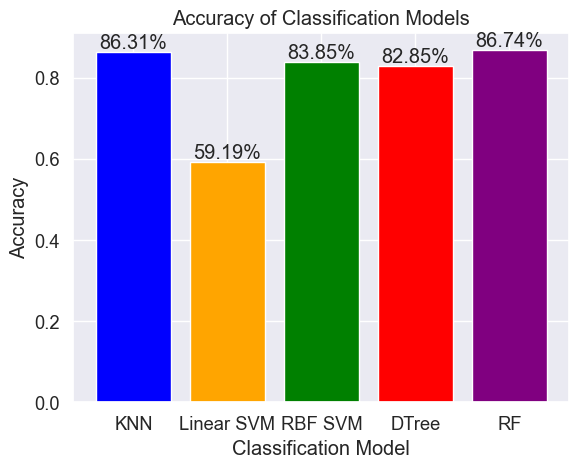

In [42]:
import matplotlib.pyplot as plt

# set up data and colors
models = ['KNN', 'Linear SVM', 'RBF SVM', 'DTree', 'RF']
accuracies = [knn_acc, l_svm_acc, rbf_svm_acc, dt_acc, rf_acc]
colors = ['blue', 'orange', 'green', 'red', 'purple']

# create bar chart with colored bars and accuracy scores
plt.bar(models, accuracies, color=colors)
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.01, '{:.2f}%'.format(acc*100), ha='center')

# add labels and title
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models')

# display the plot
plt.show()


## After Performing SMOTE random sampling 

In [43]:
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [44]:
fig = px.histogram(pd.DataFrame(y_resampled,columns=['activity']), x='activity', title='Data concerning each activity', color="activity")
fig.show()
del fig

## KNN after Smote Sampling

In [45]:

# KNN Classification
knn = KNeighborsClassifier()

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

for train_index, test_index in kf.split(X_resampled):
    X_fold_train, X_fold_test = X_resampled[train_index], X_resampled[test_index]
    y_fold_train, y_fold_test = y_resampled[train_index], y_resampled[test_index]
    
    # Train the model using the training sets
    knn.fit(X_fold_train, y_fold_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_fold_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set
knn_final = KNeighborsClassifier()
knn_final.fit(X_resampled, y_resampled)
y_pred = knn.predict(X_test)

# Calculate accuracy score
knn_acc_smote = accuracy_score(y_test, y_pred)
print('Final Test Set Accuracy: {:.2f}%'.format(knn_acc_smote * 100))
print(classification_report(y_test, y_pred))

Average K-fold Accuracy: 93.14%
Final Test Set Accuracy: 84.48%
                   precision    recall  f1-score   support

          Cycling       0.93      0.81      0.86      1157
          Jogging       0.58      0.77      0.66        62
          Pushups       0.57      0.71      0.63       111
          Sitting       0.99      1.00      0.99      1769
         Swimming       0.82      0.83      0.83       391
          Walking       0.83      0.81      0.82       306
WalkingDownstairs       0.41      0.46      0.44       282
  WalkingUpstairs       0.51      0.60      0.55       342

         accuracy                           0.84      4420
        macro avg       0.71      0.75      0.72      4420
     weighted avg       0.86      0.84      0.85      4420



                    accuracy
Sitting            99.547767
Cycling            80.985307
Walking            81.045752
Swimming            82.86445
WalkingDownstairs  46.453901
WalkingUpstairs    60.233918
Pushups            71.171171
Jogging            77.419355


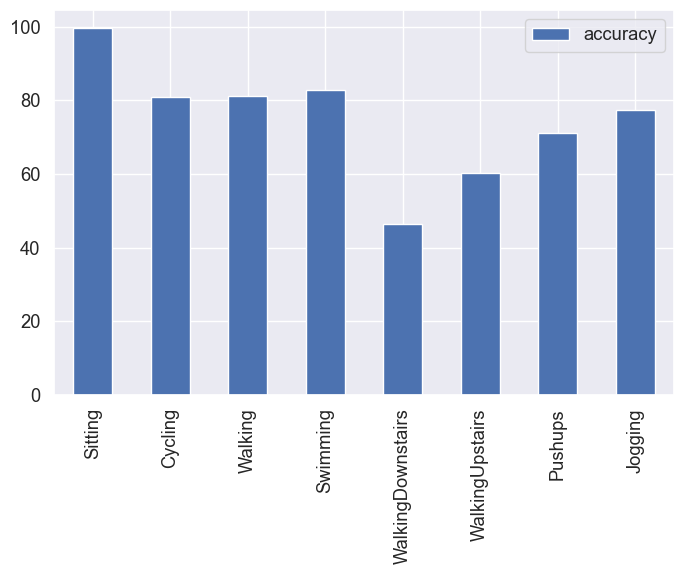

In [46]:
for activity in results.index:
    X_test_new = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_new = y_test.reset_index(drop=True)

    # filter X_test based on y_test values
    X_test_filtered = X_test_new[y_test_new==activity]
    # use the model to predict the activity
    y_predict = knn.predict(X_test_filtered)

    # get accuracy
    accuracy = accuracy_score(y_test_new[y_test_new==activity], y_predict)

    results.loc[activity, 'accuracy'] = accuracy*100

print(results)
results.plot(kind='bar', figsize=(8, 5))
plt.show()

## Linear SVM After Smote Sampling

In [47]:
# Linear SVM Classifier
svm_lin = LinearSVC(random_state=42)

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

for train_index, test_index in kf.split(X_resampled):
    X_fold_train, X_fold_test = X_resampled[train_index], X_resampled[test_index]
    y_fold_train, y_fold_test = y_resampled[train_index], y_resampled[test_index]
    
    # Train the classifier on the training data
    svm_lin.fit(X_fold_train, y_fold_train)
    
    # Make predictions on the test data
    y_pred = svm_lin.predict(X_fold_test)
    
    # Calculate accuracy of the classifier
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)
    
# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set
svm_lin_final = LinearSVC(random_state=42)
svm_lin_final.fit(X_resampled, y_resampled)
y_pred_final = svm_lin_final.predict(X_test)

# Calculate accuracy score
l_svm_acc_smote = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(l_svm_acc_smote * 100))
print(classification_report(y_test, y_pred_final))

Average K-fold Accuracy: 42.51%
Final Test Set Accuracy: 54.34%
                   precision    recall  f1-score   support

          Cycling       0.45      0.12      0.20      1157
          Jogging       0.03      0.16      0.05        62
          Pushups       0.29      0.64      0.40       111
          Sitting       0.73      0.95      0.82      1769
         Swimming       0.44      0.80      0.56       391
          Walking       0.41      0.61      0.49       306
WalkingDownstairs       0.07      0.01      0.01       282
  WalkingUpstairs       0.00      0.00      0.00       342

         accuracy                           0.54      4420
        macro avg       0.30      0.41      0.32      4420
     weighted avg       0.49      0.54      0.48      4420



                    accuracy
Sitting            94.573205
Cycling             10.11236
Walking            47.385621
Swimming           71.867008
WalkingDownstairs    1.06383
WalkingUpstairs    26.900585
Pushups            65.765766
Jogging             1.612903


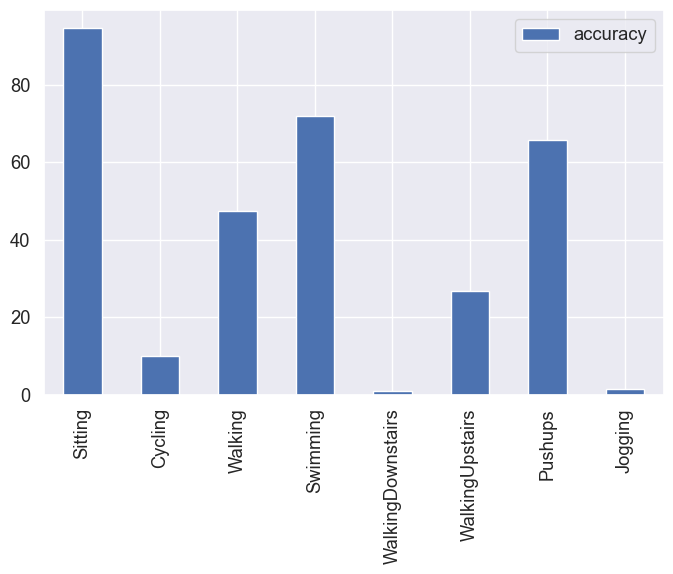

In [48]:
for activity in results.index:
    X_test_new = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_new = y_test.reset_index(drop=True)

    # filter X_test based on y_test values
    X_test_filtered = X_test_new[y_test_new==activity]
    # use the model to predict the activity
    y_predict = svm_lin.predict(X_test_filtered)

    # get accuracy
    accuracy = accuracy_score(y_test_new[y_test_new==activity], y_predict)

    results.loc[activity, 'accuracy'] = accuracy*100

print(results)
results.plot(kind='bar', figsize=(8, 5))
plt.show()

## RBF SVM After Smote Sampling

In [50]:

# RBF SVM Classifier
svm_rbf = SVC(kernel='rbf')

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

for train_index, test_index in kf.split(X_resampled):
    X_fold_train, X_fold_test = X_resampled[train_index], X_resampled[test_index]
    y_fold_train, y_fold_test = y_resampled[train_index], y_resampled[test_index]
    
    # Train the classifier on the training data
    svm_rbf.fit(X_fold_train, y_fold_train)
    
    # Make predictions on the test data
    y_pred = svm_rbf.predict(X_fold_test)
    
    # Calculate accuracy of the classifier
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)
    

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set
svm_rbf_final = SVC(kernel='rbf')
svm_rbf_final.fit(X_resampled, y_resampled)
y_pred_final = svm_rbf_final.predict(X_test)

# Calculate accuracy score
rbf_svm_acc_smote = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(rbf_svm_acc_smote * 100))
print(classification_report(y_test, y_pred_final))

Average K-fold Accuracy: 77.76%
Final Test Set Accuracy: 81.61%
                   precision    recall  f1-score   support

          Cycling       0.94      0.69      0.80      1157
          Jogging       0.54      0.79      0.64        62
          Pushups       0.66      0.67      0.66       111
          Sitting       0.97      0.99      0.98      1769
         Swimming       0.81      0.83      0.82       391
          Walking       0.80      0.88      0.84       306
WalkingDownstairs       0.38      0.59      0.46       282
  WalkingUpstairs       0.43      0.49      0.46       342

         accuracy                           0.82      4420
        macro avg       0.69      0.74      0.71      4420
     weighted avg       0.84      0.82      0.82      4420



                    accuracy
Sitting            99.208592
Cycling            69.749352
Walking            87.581699
Swimming           83.120205
WalkingDownstairs  59.574468
WalkingUpstairs    49.122807
Pushups            64.864865
Jogging            79.032258


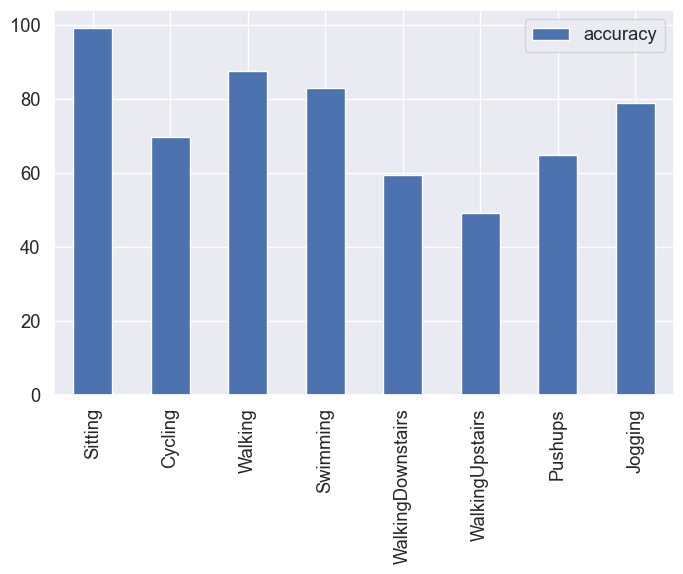

In [51]:
for activity in results.index:
    X_test_new = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_new = y_test.reset_index(drop=True)

    # filter X_test based on y_test values
    X_test_filtered = X_test_new[y_test_new==activity]
    # use the model to predict the activity
    y_predict = svm_rbf.predict(X_test_filtered)

    # get accuracy
    accuracy = accuracy_score(y_test_new[y_test_new==activity], y_predict)

    results.loc[activity, 'accuracy'] = accuracy*100

print(results)
results.plot(kind='bar', figsize=(8, 5))
plt.show()

## Decision Tree After Smote Sampling

In [52]:
# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

for train_index, test_index in kf.split(X_resampled):
    X_fold_train, X_fold_test = X_resampled[train_index], X_resampled[test_index]
    y_fold_train, y_fold_test = y_resampled[train_index], y_resampled[test_index]
    
    # Train the classifier using the training sets
    tree.fit(X_fold_train, y_fold_train)
    
    # Make predictions on the test set
    y_pred = tree.predict(X_fold_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Print classification report
    #print(classification_report(y_fold_test, y_pred))

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set
tree_final = DecisionTreeClassifier(random_state=42)
tree_final.fit(X_resampled, y_resampled)
y_pred_final = tree_final.predict(X_test)

# Calculate accuracy score
dt_acc_smote = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(dt_acc_smote * 100))
print(classification_report(y_test, y_pred_final))

Average K-fold Accuracy: 89.25%
Final Test Set Accuracy: 81.54%
                   precision    recall  f1-score   support

          Cycling       0.88      0.79      0.83      1157
          Jogging       0.43      0.69      0.53        62
          Pushups       0.52      0.61      0.56       111
          Sitting       0.99      0.99      0.99      1769
         Swimming       0.81      0.79      0.80       391
          Walking       0.79      0.73      0.76       306
WalkingDownstairs       0.37      0.39      0.38       282
  WalkingUpstairs       0.44      0.54      0.49       342

         accuracy                           0.82      4420
        macro avg       0.65      0.69      0.67      4420
     weighted avg       0.83      0.82      0.82      4420



                    accuracy
Sitting            99.095534
Cycling            78.219533
Walking            71.895425
Swimming           78.772379
WalkingDownstairs  41.134752
WalkingUpstairs    53.216374
Pushups             60.36036
Jogging            61.290323


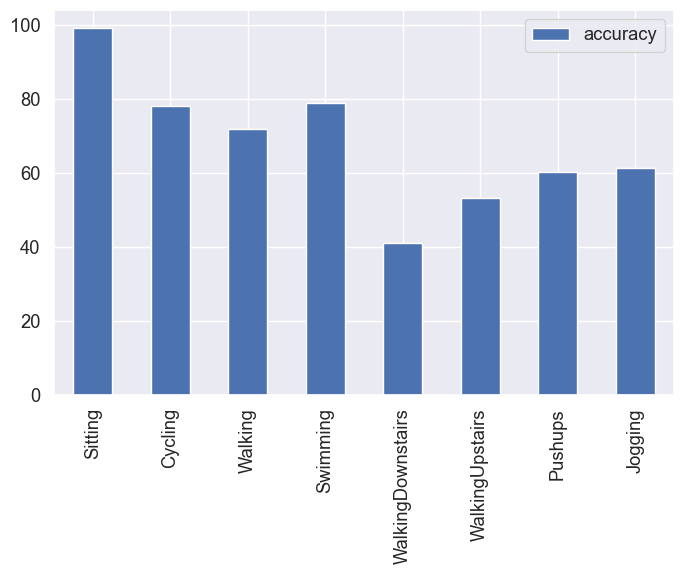

In [53]:
for activity in results.index:
    X_test_new = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_new = y_test.reset_index(drop=True)

    # filter X_test based on y_test values
    X_test_filtered = X_test_new[y_test_new==activity]
    # use the model to predict the activity
    y_predict = tree.predict(X_test_filtered)

    # get accuracy
    accuracy = accuracy_score(y_test_new[y_test_new==activity], y_predict)

    results.loc[activity, 'accuracy'] = accuracy*100

print(results)
results.plot(kind='bar', figsize=(8, 5))
plt.show()

## Random Forest After Smote Sampling

In [54]:
# Random Forest Classifier
forest = RandomForestClassifier(random_state=42)

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

for train_index, test_index in kf.split(X_resampled):
    X_fold_train, X_fold_test = X_resampled[train_index], X_resampled[test_index]
    y_fold_train, y_fold_test = y_resampled[train_index], y_resampled[test_index]
    
    # Train the classifier using the training sets
    forest.fit(X_fold_train, y_fold_train)
    
    # Make predictions on the test set
    y_pred = forest.predict(X_fold_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Print classification report
    #print(classification_report(y_fold_test, y_pred))

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set
forest_final = RandomForestClassifier(random_state=42)
forest_final.fit(X_resampled, y_resampled)
y_pred_final = forest_final.predict(X_test)

# Calculate accuracy score
rf_acc_smote = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(rf_acc_smote * 100))
print(classification_report(y_test, y_pred_final))

Average K-fold Accuracy: 93.78%
Final Test Set Accuracy: 86.58%
                   precision    recall  f1-score   support

          Cycling       0.92      0.85      0.89      1157
          Jogging       0.54      0.82      0.65        62
          Pushups       0.73      0.70      0.72       111
          Sitting       1.00      0.99      1.00      1769
         Swimming       0.87      0.88      0.87       391
          Walking       0.84      0.88      0.86       306
WalkingDownstairs       0.46      0.42      0.44       282
  WalkingUpstairs       0.54      0.65      0.59       342

         accuracy                           0.87      4420
        macro avg       0.74      0.77      0.75      4420
     weighted avg       0.87      0.87      0.87      4420



                    accuracy
Sitting            99.321651
Cycling            84.961106
Walking            87.908497
Swimming            87.97954
WalkingDownstairs  42.553191
WalkingUpstairs    62.865497
Pushups             70.27027
Jogging            80.645161


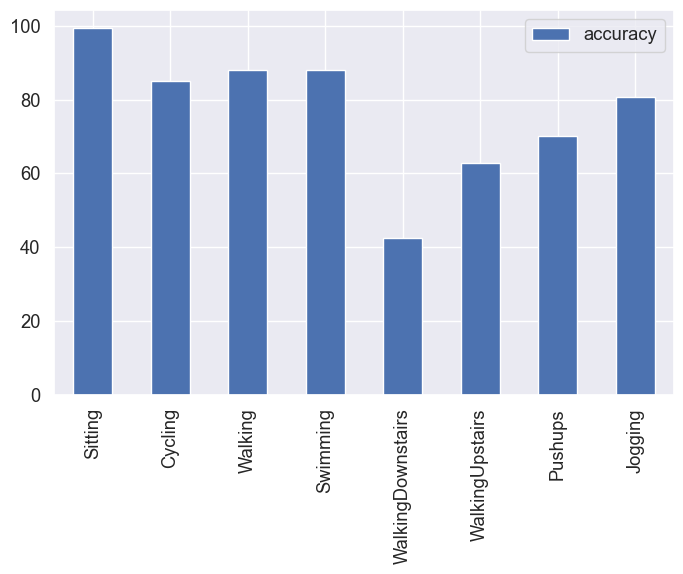

In [55]:
for activity in results.index:
    X_test_new = pd.DataFrame(X_test).reset_index(drop=True)
    y_test_new = y_test.reset_index(drop=True)

    # filter X_test based on y_test values
    X_test_filtered = X_test_new[y_test_new==activity]
    # use the model to predict the activity
    y_predict = forest.predict(X_test_filtered)

    # get accuracy
    accuracy = accuracy_score(y_test_new[y_test_new==activity], y_predict)

    results.loc[activity, 'accuracy'] = accuracy*100

print(results)
results.plot(kind='bar', figsize=(8, 5))
plt.show()

## Predictions of each Model after Smote Sampling

In [56]:
# select a random activity from y_test
activity = y_test.sample().iloc[0]

# reset the index of X_test and y_test
X_test = pd.DataFrame(X_test).reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# filter X_test based on y_test values
X_test_filtered = X_test[y_test == activity]
# randomly select 1 row
X_test_filtered = X_test_filtered.sample(n=1)

# use the models to predict the activity
knn_predict = knn.predict(X_test_filtered)
svm_lin_predict = svm_lin.predict(X_test_filtered)
svm_rbf_predict = svm_rbf.predict(X_test_filtered)
dt_predict = tree.predict(X_test_filtered)
rf_predict = forest.predict(X_test_filtered)

# print the predicted activity for each model and the actual activity
print('KNN Predicted activity: ', knn_predict[0])
print('SVM Linear Predicted activity: ', svm_lin_predict[0])
print('SVM RBF Predicted activity: ', svm_rbf_predict[0])
print('DT Predicted activity: ', dt_predict[0])
print('RF Predicted activity: ', rf_predict[0])
print('Actual activity: ', activity)

KNN Predicted activity:  Sitting
SVM Linear Predicted activity:  Sitting
SVM RBF Predicted activity:  Sitting
DT Predicted activity:  Sitting
RF Predicted activity:  Sitting
Actual activity:  Sitting


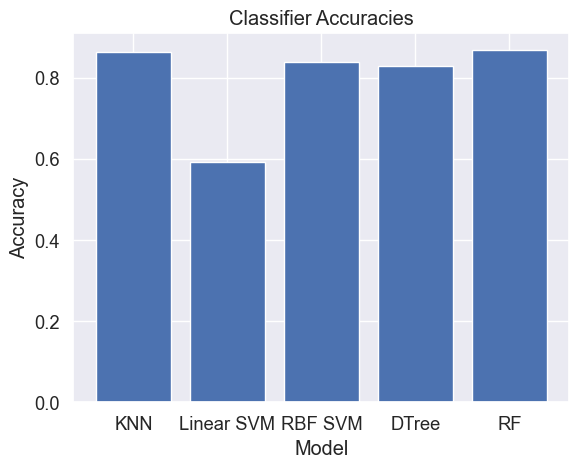

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Define classifiers
classifiers = {'KNN': KNeighborsClassifier(),
               'Linear SVM': LinearSVC(random_state=42),
               'RBF SVM': SVC(kernel='rbf'),
               'DTree': DecisionTreeClassifier(random_state=42),
               'RF': RandomForestClassifier(random_state=42)}

# Train and evaluate classifiers
accuracies = {}
for name, clf in classifiers.items():
    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    # Print accuracy and classification report
    

# Plot accuracies of all the models
plt.bar(range(len(accuracies)), list(accuracies.values()), align='center')
plt.xticks(range(len(accuracies)), list(accuracies.keys()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.show()


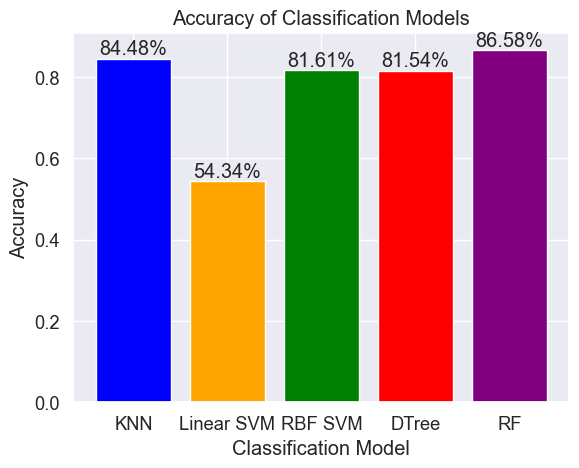

In [58]:
import matplotlib.pyplot as plt

# set up data and colors
models = ['KNN', 'Linear SVM', 'RBF SVM', 'DTree', 'RF']
accuracies = [knn_acc_smote, l_svm_acc_smote, rbf_svm_acc_smote, dt_acc_smote, rf_acc_smote]
colors = ['blue', 'orange', 'green', 'red', 'purple']

# create bar chart with colored bars and accuracy scores
plt.bar(models, accuracies, color=colors)
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.01, '{:.2f}%'.format(acc*100), ha='center')

# add labels and title
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classification Models')

# display the plot
plt.show()


## Applying Hyperparameter Tuning on Random Sample as it Produced better accuracies than Smote Sampling

## KNN Using Hyperparameter Tuning

In [59]:
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

param_grid = {
    'n_neighbors': [3, 5, 7],  # List of values to try for the n_neighbors hyperparameter
    'weights': ['uniform', 'distance']  # List of values to try for the weights hyperparameter
}

for train_index, test_index in kf.split(X_scaled_pca):
    X_fold_train, X_fold_test = X_scaled_pca[train_index], X_scaled_pca[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]

    # KNN Classification
    knn = KNeighborsClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(knn, param_grid, cv=k)
    grid_search.fit(X_fold_train, y_fold_train)

    # Get the best model from the grid search
    best_knn = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_knn.predict(X_fold_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the best parameters
print('Best Parameters: ', grid_search.best_params_)

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set using the best model
best_knn_final = grid_search.best_estimator_
best_knn_final.fit(X_train, y_train)
y_pred_final = best_knn_final.predict(X_test)

# Calculate accuracy score
knn_acc_hyp = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy after Hyperparamter Tuning: {:.2f}%'.format(knn_acc_hyp * 100))
print(classification_report(y_test, y_pred_final))

Best Parameters:  {'n_neighbors': 5, 'weights': 'uniform'}
Average K-fold Accuracy: 85.57%
Final Test Set Accuracy after Hyperparamter Tuning: 86.31%
                   precision    recall  f1-score   support

          Cycling       0.86      0.90      0.88      1157
          Jogging       0.88      0.45      0.60        62
          Pushups       0.76      0.63      0.69       111
          Sitting       0.99      1.00      0.99      1769
         Swimming       0.83      0.88      0.86       391
          Walking       0.84      0.85      0.84       306
WalkingDownstairs       0.48      0.43      0.45       282
  WalkingUpstairs       0.59      0.54      0.56       342

         accuracy                           0.86      4420
        macro avg       0.78      0.71      0.73      4420
     weighted avg       0.86      0.86      0.86      4420



## Linear SVM Using Hyperparameter Tuning

In [60]:
# Linear SVM Classifier
svm_lin = LinearSVC(random_state=42)

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

param_grid = {
    'C': [0.1, 1, 10],  # List of values to try for the C hyperparameter
    'penalty': ['l1', 'l2']  # List of values to try for the penalty hyperparameter
}

for train_index, test_index in kf.split(X_scaled_pca):
    X_fold_train, X_fold_test = X_scaled_pca[train_index], X_scaled_pca[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(svm_lin, param_grid, cv=k)
    grid_search.fit(X_fold_train, y_fold_train)

    # Get the best model from the grid search
    best_svm_lin = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_svm_lin.predict(X_fold_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the best parameters
print('Best Parameters: ', grid_search.best_params_)

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set using the best model
best_svm_lin_final = grid_search.best_estimator_
best_svm_lin_final.fit(X_train, y_train)
y_pred_final = best_svm_lin_final.predict(X_test)

# Calculate accuracy score
l_svm_acc_hyp = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(l_svm_acc_hyp * 100))
print(classification_report(y_test, y_pred_final))

Best Parameters:  {'C': 0.1, 'penalty': 'l2'}
Average K-fold Accuracy: 59.07%
Final Test Set Accuracy: 58.82%
                   precision    recall  f1-score   support

          Cycling       0.44      0.36      0.39      1157
          Jogging       1.00      0.02      0.03        62
          Pushups       0.00      0.00      0.00       111
          Sitting       0.71      0.95      0.81      1769
         Swimming       0.46      0.88      0.61       391
          Walking       0.46      0.56      0.50       306
WalkingDownstairs       0.00      0.00      0.00       282
  WalkingUpstairs       1.00      0.00      0.01       342

         accuracy                           0.59      4420
        macro avg       0.51      0.34      0.29      4420
     weighted avg       0.56      0.59      0.52      4420



## RBF SVM Using Hyperparameter Tuning

In [ ]:
# RBF SVM Classifier
svm_rbf = SVC(kernel='rbf')

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

param_grid = {
    'C': [0.1, 1, 10],  # List of values to try for the C hyperparameter
    'gamma': [0.1, 1, 10]  # List of values to try for the gamma hyperparameter
}

for train_index, test_index in kf.split(X_scaled_pca):
    X_fold_train, X_fold_test = X_scaled_pca[train_index], X_scaled_pca[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(svm_rbf, param_grid, cv=k)
    grid_search.fit(X_fold_train, y_fold_train)

    # Get the best model from the grid search
    best_svm_rbf = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_svm_rbf.predict(X_fold_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the best parameters
print('Best Parameters: ', grid_search.best_params_)

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set using the best model
best_svm_rbf_final = grid_search.best_estimator_
best_svm_rbf_final.fit(X_train, y_train)
y_pred_final = best_svm_rbf_final.predict(X_test)

# Calculate accuracy score
rbf_svm_acc_hyp = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(rbf_svm_acc_hyp * 100))
print(classification_report(y_test, y_pred_final))

## Decision Tree Using Hyperparameter Tuning

In [ ]:
# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

param_grid = {
    'max_depth': [None, 5, 10],  # List of values to try for the max_depth hyperparameter
    'min_samples_split': [2, 5, 10]  # List of values to try for the min_samples_split hyperparameter
}

for train_index, test_index in kf.split(X_scaled_pca):
    X_fold_train, X_fold_test = X_scaled_pca[train_index], X_scaled_pca[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(tree, param_grid, cv=k)
    grid_search.fit(X_fold_train, y_fold_train)

    # Get the best model from the grid search
    best_tree = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_tree.predict(X_fold_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the best parameters
print('Best Parameters: ', grid_search.best_params_)

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set using the best model
best_tree_final = grid_search.best_estimator_
best_tree_final.fit(X_train, y_train)
y_pred_final = best_tree_final.predict(X_test)

# Calculate accuracy score
dt_acc_hyp = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(dt_acc_hyp * 100))
print(classification_report(y_test, y_pred_final))


## Random Forest Using Hyperparameter Tuning

In [ ]:
# Random Forest Classifier
forest = RandomForestClassifier(random_state=42)

# K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

accuracy_scores = []  # List to store accuracy scores

param_grid = {
    'n_estimators': [100, 200, 300],  # List of values to try for the n_estimators hyperparameter
    'max_depth': [None, 5, 10],  # List of values to try for the max_depth hyperparameter
    'min_samples_split': [2, 5, 10]  # List of values to try for the min_samples_split hyperparameter
}

for train_index, test_index in kf.split(X_scaled_pca):
    X_fold_train, X_fold_test = X_scaled_pca[train_index], X_scaled_pca[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(forest, param_grid, cv=k)
    grid_search.fit(X_fold_train, y_fold_train)

    # Get the best model from the grid search
    best_forest = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_forest.predict(X_fold_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the best parameters
print('Best Parameters: ', grid_search.best_params_)

# Calculate average accuracy
avg_accuracy = sum(accuracy_scores) / k
print('Average K-fold Accuracy: {:.2f}%'.format(avg_accuracy * 100))

# Final evaluation on the test set using the best model
best_forest_final = grid_search.best_estimator_
best_forest_final.fit(X_train, y_train)
y_pred_final = best_forest_final.predict(X_test)

# Calculate accuracy score
rf_acc_hyp = accuracy_score(y_test, y_pred_final)
print('Final Test Set Accuracy: {:.2f}%'.format(rf_acc_hyp * 100))
print(classification_report(y_test, y_pred_final))

## Comparison of Accuracies for each Model

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for Normal Sampling
accuracies_normal = [knn_acc, l_svm_acc, rbf_svm_acc, dt_acc, rf_acc]

# Accuracy values for SMOTE Sampling
accuracies_smote = [knn_acc_smote, l_svm_acc_smote, rbf_svm_acc_smote, dt_acc_smote, rf_acc_smote]

# Accuracy values for Hyperparameter Tuning
accuracies_hyp = [knn_acc_hyp, l_svm_acc_hyp, rbf_svm_acc_hyp, dt_acc_hyp, rf_acc_hyp]

# Model names
models = ['KNN', 'Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest']

# Set the bar width
bar_width = 0.3

# Set the x coordinates of the bars
bar_pos1 = range(len(models))
bar_pos2 = [x + bar_width for x in bar_pos1]
bar_pos3 = [x + 2 * bar_width for x in bar_pos1]

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the bar graph
ax.bar(bar_pos1, accuracies_normal, color='b', width=bar_width, label='Normal Sampling')
ax.bar(bar_pos2, accuracies_smote, color='g', width=bar_width, label='SMOTE Sampling')
ax.bar(bar_pos3, accuracies_hyp, color='r', width=bar_width, label='Hyperparameter Tuning')

# Set the labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Different Models and Phases')
ax.set_xticks([r + bar_width for r in range(len(models))])
ax.set_xticklabels(models)

# Position the legend at the top right
ax.legend(loc='upper right')

# Show the plot
plt.show()
